In [1]:
%%capture
!pip install torch torchvision torchaudio
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install tranformers
!pip install translate
!pip install nltk
!pip install pandas transformers torch tqdm protobuf
!pip install translate
!pip install torch torchvision torchaudio
!pip install ipywidgets

!pip install openpyxl
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import nltk
import seaborn as sns

## Prediction using H20 Auto ML

#### Load the data and remove unnecessary columns for training

In [2]:
data = pd.read_csv('twitter_roberta_based_emotion_sentiment_updated_data.csv')
data

Unnamed: 0    Weekday  Hour  Day Lang  IsReshare   Reach  \
0                1    Tuesday     7   12   en      False   991.0   
1                2    Tuesday     7   12   en      False   991.0   
2                3     Monday    12   15   en      False   390.0   
3                4  Wednesday    23   23   es      False   402.0   
4                5   Thursday    21   24   es      False   403.0   
...            ...        ...   ...  ...  ...        ...     ...   
102017      168532     Monday     6   21   en      False  5910.0   
102018      168533  Wednesday    10   10   en       True   716.0   
102019      168534   Thursday    13   21   en       True   399.0   
102020      168535  Wednesday     7   23   en       True    87.0   
102021      168536   Saturday     3    2   en      False   633.0   

        RetweetCount  Likes  Klout  ...        Country          State  \
0                1.0    0.0   42.0  ...  United States       Michigan   
1                1.0    0.0   42.0  ...  United States       Michigan   
2                0.0    0.0   25.0  ...  United States  Massachusetts   
3                0.0    0.0   32.0  ...         Mexico     Tamaulipas   
4                0.0    0.0   32.0  ...         Mexico     Tamaulipas   
...              ...    ...    ...  ...            ...            ...   
102017           1.0    0.0   55.0  ...    Netherlands  North Holland   
102018          24.0    0.0    0.0  ...    Switzerland         Zurich   
102019          16.0    0.0   43.0  ...  United States       Illinois   
102020         154.0    0.0   20.0  ...        Germany        Bavaria   
102021           0.0    0.0   38.0  ...  United States       New York   

       StateCode           City   Gender joy_probability optimism_probability  \
0          US-MI        Detroit   Female        0.054265             0.699100   
1          US-MI        Detroit   Female        0.067866             0.274897   
2          US-MA         Boston   Unisex        0.983336             0.002837   
3             MX   Nuevo Laredo   Female        0.150150             0.572824   
4             MX   Nuevo Laredo   Female        0.263906             0.326902   
...          ...            ...      ...             ...                  ...   
102017        NL      Amsterdam  Unknown        0.029394             0.802525   
102018        CH     Winterthur     Male        0.524965             0.278535   
102019     US-IL      Hampshire   Unisex        0.229822             0.456503   
102020        DE         Munich     Male        0.391068             0.317381   
102021     US-NY  New York City  Unknown        0.112041             0.290365   

        anger_probability  sadness_probability  best_emotion  
0                0.195411             0.051224      optimism  
1                0.578567             0.078670         anger  
2                0.003984             0.009843           joy  
3                0.129507             0.147518      optimism  
4                0.151249             0.257943      optimism  
...                   ...                  ...           ...  
102017           0.144538             0.023543      optimism  
102018           0.082156             0.114344           joy  
102019           0.282737             0.030937      optimism  
102020           0.133483             0.158068           joy  
102021           0.551295             0.046299         anger  

[102022 rows x 22 columns]

In [8]:
# Remove unnecessary columns
data_cleaned = data.drop(columns=['Unnamed: 0', 'StateCode','Hour','Day', 'IsReshare','text', 'Country', 'State', 'City'])
data_cleaned

Weekday Lang   Reach  RetweetCount  Likes  Klout  Sentiment  \
0         Tuesday   en   991.0           1.0    0.0   42.0       1.00   
1         Tuesday   en   991.0           1.0    0.0   42.0       1.00   
2          Monday   en   390.0           0.0    0.0   25.0      -2.00   
3       Wednesday   es   402.0           0.0    0.0   32.0       0.17   
4        Thursday   es   403.0           0.0    0.0   32.0       0.20   
...           ...  ...     ...           ...    ...    ...        ...   
102017     Monday   en  5910.0           1.0    0.0   55.0       0.00   
102018  Wednesday   en   716.0          24.0    0.0    0.0       0.00   
102019   Thursday   en   399.0          16.0    0.0   43.0       1.00   
102020  Wednesday   en    87.0         154.0    0.0   20.0       0.00   
102021   Saturday   en   633.0           0.0    0.0   38.0       0.00   

         Gender  joy_probability  optimism_probability  anger_probability  \
0        Female         0.054265              0.699100           0.195411   
1        Female         0.067866              0.274897           0.578567   
2        Unisex         0.983336              0.002837           0.003984   
3        Female         0.150150              0.572824           0.129507   
4        Female         0.263906              0.326902           0.151249   
...         ...              ...                   ...                ...   
102017  Unknown         0.029394              0.802525           0.144538   
102018     Male         0.524965              0.278535           0.082156   
102019   Unisex         0.229822              0.456503           0.282737   
102020     Male         0.391068              0.317381           0.133483   
102021  Unknown         0.112041              0.290365           0.551295   

        sadness_probability best_emotion  
0                  0.051224     optimism  
1                  0.078670        anger  
2                  0.009843          joy  
3                  0.147518     optimism  
4                  0.257943     optimism  
...                     ...          ...  
102017             0.023543     optimism  
102018             0.114344          joy  
102019             0.030937     optimism  
102020             0.158068          joy  
102021             0.046299        anger  

[102022 rows x 13 columns]

In [9]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102022 entries, 0 to 102021
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Weekday               102022 non-null  object 
 1   Lang                  102022 non-null  object 
 2   Reach                 102022 non-null  float64
 3   RetweetCount          102022 non-null  float64
 4   Likes                 102022 non-null  float64
 5   Klout                 102022 non-null  float64
 6   Sentiment             102022 non-null  float64
 7   Gender                102022 non-null  object 
 8   joy_probability       102022 non-null  float64
 9   optimism_probability  102022 non-null  float64
 10  anger_probability     102022 non-null  float64
 11  sadness_probability   102022 non-null  float64
 12  best_emotion          102022 non-null  object 
dtypes: float64(9), object(4)
memory usage: 10.1+ MB


#### Data preparation for training H20 Auto ML

In [10]:
!pip install h2o

import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# Convert the pandas DataFrame to an H2OFrame
hf = h2o.H2OFrame(data_cleaned)

# Set the predictors and response columns
predictors = hf.columns
response_likes = 'Likes'
response_retweets = 'RetweetCount'

# Remove the response columns from the list of predictors
predictors.remove(response_likes)
predictors.remove(response_retweets)

Defaulting to user installation because normal site-packages is not writeable
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  --------------------------------
H2O_cluster_uptime:         1 day 19 hours 27 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.2
H2O_cluster_version_age:    9 days
H2O_cluster_name:           H2O_from_python_azureuser_d2t9vq
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.921 Gb
H2O_cluster_total_cores:    4
H2O_cluster_allowed_cores:  4
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  --------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [11]:
# Split the data into training and validation sets
train, valid = hf.split_frame(ratios=[0.8], seed=1234)

In [12]:
# Run H2O AutoML for Likes
aml_likes = H2OAutoML(max_models=10, max_runtime_secs=60, seed=1, verbosity="info")
aml_likes.train(x=predictors, y=response_likes, training_frame=train, validation_frame=valid)

# Run H2O AutoML for RetweetCount
aml_retweets = H2OAutoML(max_models=10, max_runtime_secs=60, seed=1, verbosity="info")
aml_retweets.train(x=predictors, y=response_retweets, training_frame=train, validation_frame=valid)

AutoML progress: |
10:43:57.202: Project: AutoML_28_20240523_104357
10:43:57.202: Blending will be used.
10:43:57.202: Setting stopping tolerance adaptively based on the training frame: 0.0035011936728745487
10:43:57.202: Build control seed: 1
10:43:57.202: Since cross-validation is disabled, and blending frame(s) were not provided, automatically split the training data into training, blending frame(s) in the ratio 80/0/20.
10:43:57.229: training frame: Frame key: AutoML_28_20240523_104357_training_py_5_sid_8f9d    cols: 13    rows: 65236  chunks: 4    size: 2954660  checksum: -4590347526199558232
10:43:57.229: validation frame: Frame key: py_6_sid_8f9d    cols: 13    rows: 20445  chunks: 4    size: 936749  checksum: -7709534424850753896
10:43:57.229: leaderboard frame: Frame key: py_6_sid_8f9d    cols: 13    rows: 20445  chunks: 4    size: 936749  checksum: -7709534424850753896
10:43:57.231: blending frame: Frame key: AutoML_28_20240523_104357_blending_py_5_sid_8f9d    cols: 13    row

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_29_20240523_104426


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  --------
Stacking strategy                     blending
Number of base models (used / total)  5/10
# GBM base models (used / total)      0/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      2/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    AUTO
Metalearner nfolds                    0
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 109.27325006319795
RMSE: 10.453384622369827
MAE: 3.829745877007717
RMSLE: NaN
Mean Residual Deviance: 109.27325006319795
R^2: 0.8724771873278017
Null degrees of freedom: 9915
Residual degrees of freedom: 9910
Null deviance: 8497652.220133597
Residual deviance: 1083553.547626671
AIC: 74698.62171945957

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 42183.67723741512
RMSE: 205.38665301673115
MAE: 7.641881453205163
RMSLE: NaN
Mean Residual Deviance: 42183.67723741512
R^2: 0.014249964734565634
Null degrees of freedom: 20444
Residual degrees of freedom: 20439
Null deviance: 874967722.8595958
Residual deviance: 862445281.118952
AIC: 275769.3251605862

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

## Model Explainability:

#### H2O AutoML provides tools for model explainability which you can use to interpret the model's behavior

In [13]:
# Get the leaderboard for Likes
lb_likes = aml_likes.leaderboard
print("Leaderboard for Likes:")
lb_likes.head()

Leaderboard for Likes:


model_id                                                     rmse      mse       mae       rmsle    mean_residual_deviance
--------------------------------------------------------  -------  -------  --------  ----------  ------------------------
StackedEnsemble_BestOfFamily_1_AutoML_28_20240523_104357  1.8107   3.27864  0.164549  nan                          3.27864
StackedEnsemble_AllModels_1_AutoML_28_20240523_104357     1.81123  3.28056  0.154413  nan                          3.28056
GBM_1_AutoML_28_20240523_104357                           1.81869  3.30763  0.176432  nan                          3.30763
GBM_2_AutoML_28_20240523_104357                           1.85912  3.45635  0.141643  nan                          3.45635
GBM_3_AutoML_28_20240523_104357                           1.86649  3.48378  0.144905  nan                          3.48378
GBM_4_AutoML_28_20240523_104357                           1.87136  3.50198  0.138522  nan                          3.50198
DRF_1_AutoML_28_20240523_104357                           1.87547  3.51738  0.134894    0.175435                   3.51738
XRT_1_AutoML_28_20240523_104357                           1.90624  3.63375  0.150858    0.172612                   3.63375
XGBoost_3_AutoML_28_20240523_104357                       1.91414  3.66394  0.142366  nan                          3.66394
XGBoost_1_AutoML_28_20240523_104357                       2.06449  4.26212  0.196481  nan                          4.26212
[10 rows x 6 columns]

In [14]:
# Get the leaderboard for RetweetCount
lb_retweets = aml_retweets.leaderboard
print("Leaderboard for RetweetCount:")
lb_retweets.head()

Leaderboard for RetweetCount:


model_id                                                     rmse      mse      mae      rmsle    mean_residual_deviance
--------------------------------------------------------  -------  -------  -------  ---------  ------------------------
StackedEnsemble_AllModels_1_AutoML_29_20240523_104426     205.387  42183.7  7.64188  nan                         42183.7
StackedEnsemble_BestOfFamily_1_AutoML_29_20240523_104426  205.398  42188.2  7.64778  nan                         42188.2
XRT_1_AutoML_29_20240523_104426                           205.445  42207.5  8.06726    1.15906                   42207.5
DRF_1_AutoML_29_20240523_104426                           205.449  42209.5  8.07334    1.16804                   42209.5
XGBoost_2_AutoML_29_20240523_104426                       205.453  42210.8  8.42883  nan                         42210.8
XGBoost_1_AutoML_29_20240523_104426                       205.462  42214.7  8.78077  nan                         42214.7
GBM_4_AutoML_29_20240523_104426                           205.49   42226.1  8.73548  nan                         42226.1
XGBoost_3_AutoML_29_20240523_104426                       205.519  42238    9.31372  nan                         42238
GBM_3_AutoML_29_20240523_104426                           205.583  42264.5  9.36591  nan                         42264.5
GBM_2_AutoML_29_20240523_104426                           205.637  42286.5  9.62728  nan                         42286.5
[10 rows x 6 columns]

In [15]:
# Get the best models
best_model_likes = aml_likes.leader
best_model_retweets = aml_retweets.leader

In [16]:
best_model_likes

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_28_20240523_104357


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  --------
Stacking strategy                     blending
Number of base models (used / total)  2/5
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  1/1
# DRF base models (used / total)      0/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    AUTO
Metalearner nfolds                    0
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 2.71505435788597
RMSE: 1.6477422000683146
MAE: 0.14804619730853846
RMSLE: NaN
Mean Residual Deviance: 2.71505435788597
R^2: 0.6140516165706997
Null degrees of freedom: 9915
Residual degrees of freedom: 9913
Null deviance: 69759.74089341382
Residual deviance: 26922.479012797277
AIC: 38052.608529719284

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 3.278637011295693
RMSE: 1.8107006962211323
MAE: 0.16454937222504198
RMSLE: NaN
Mean Residual Deviance: 3.278637011295693
R^2: 0.45435299409063823
Null degrees of freedom: 20444
Residual degrees of freedom: 20442
Null deviance: 122848.19425132102
Residual deviance: 67031.73369594045
AIC: 82305.35780352869

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

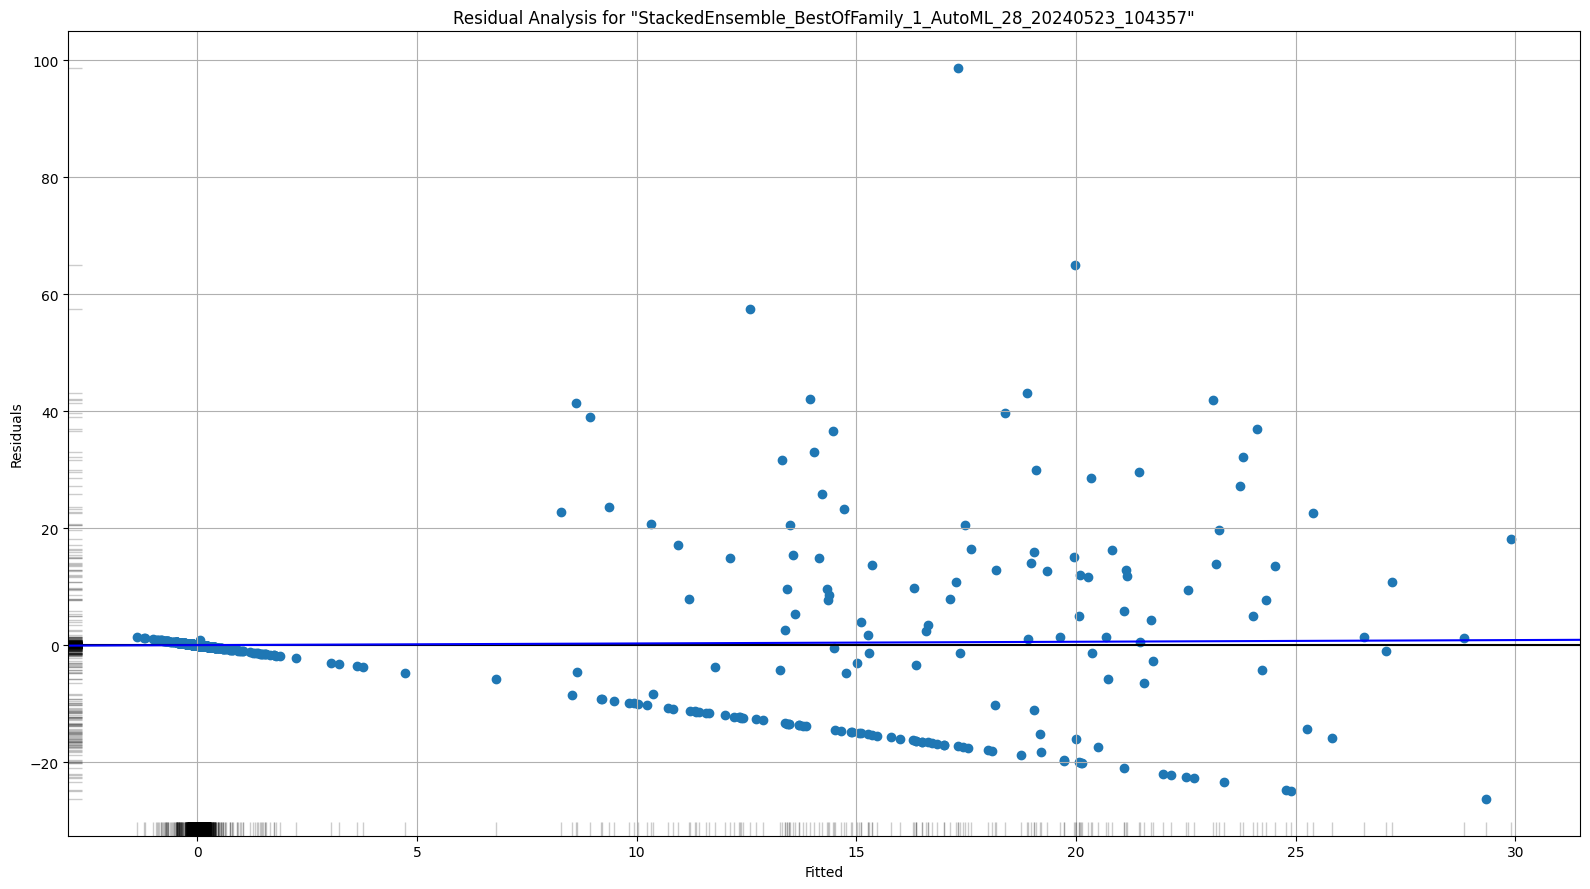

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

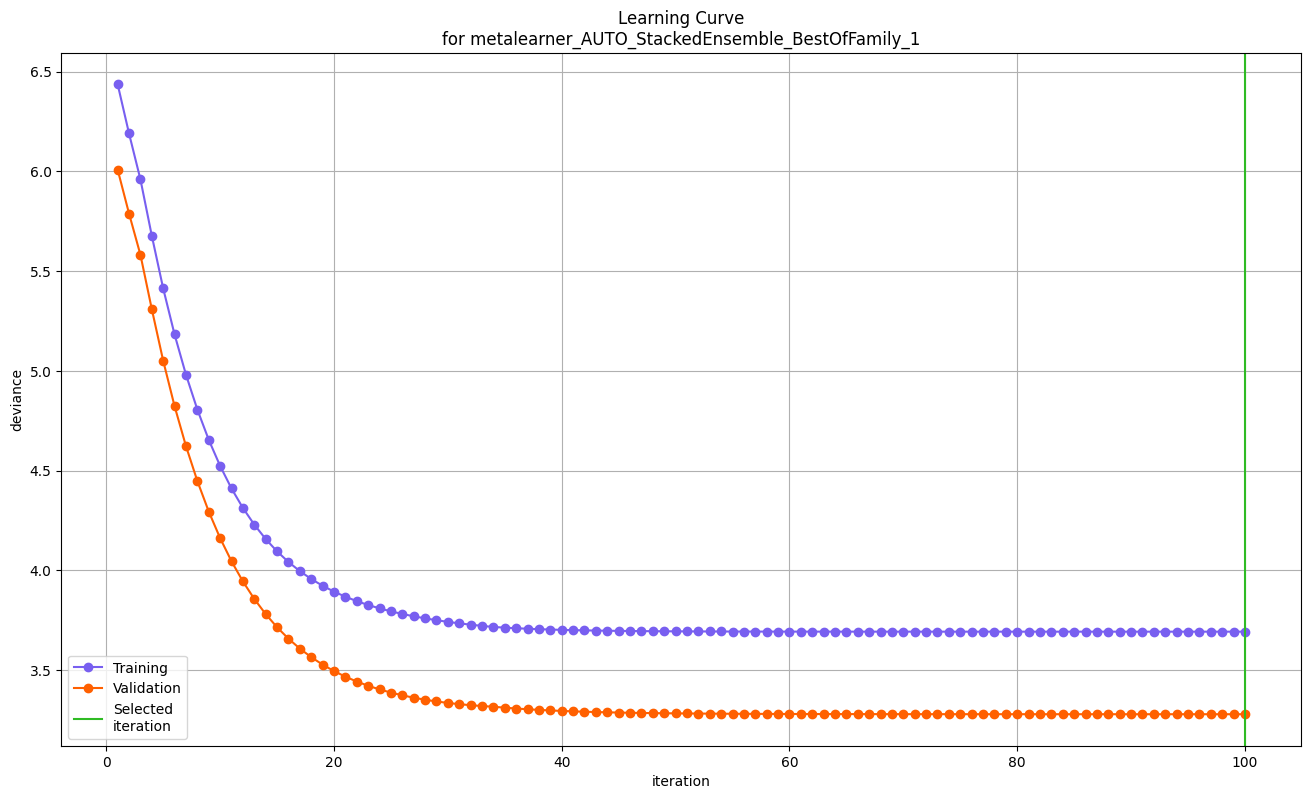

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

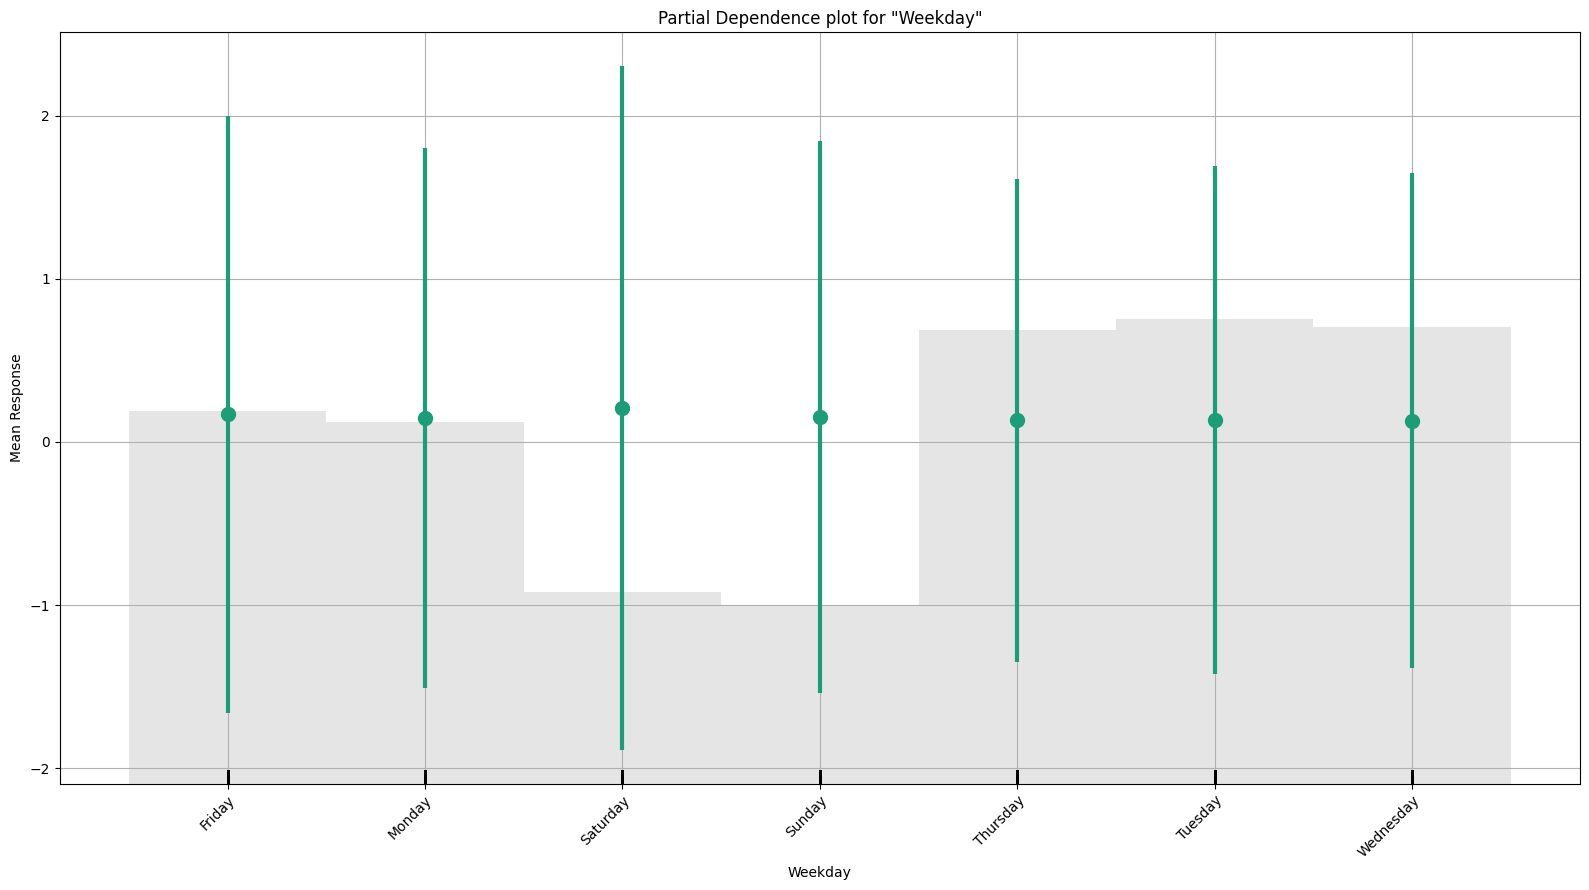

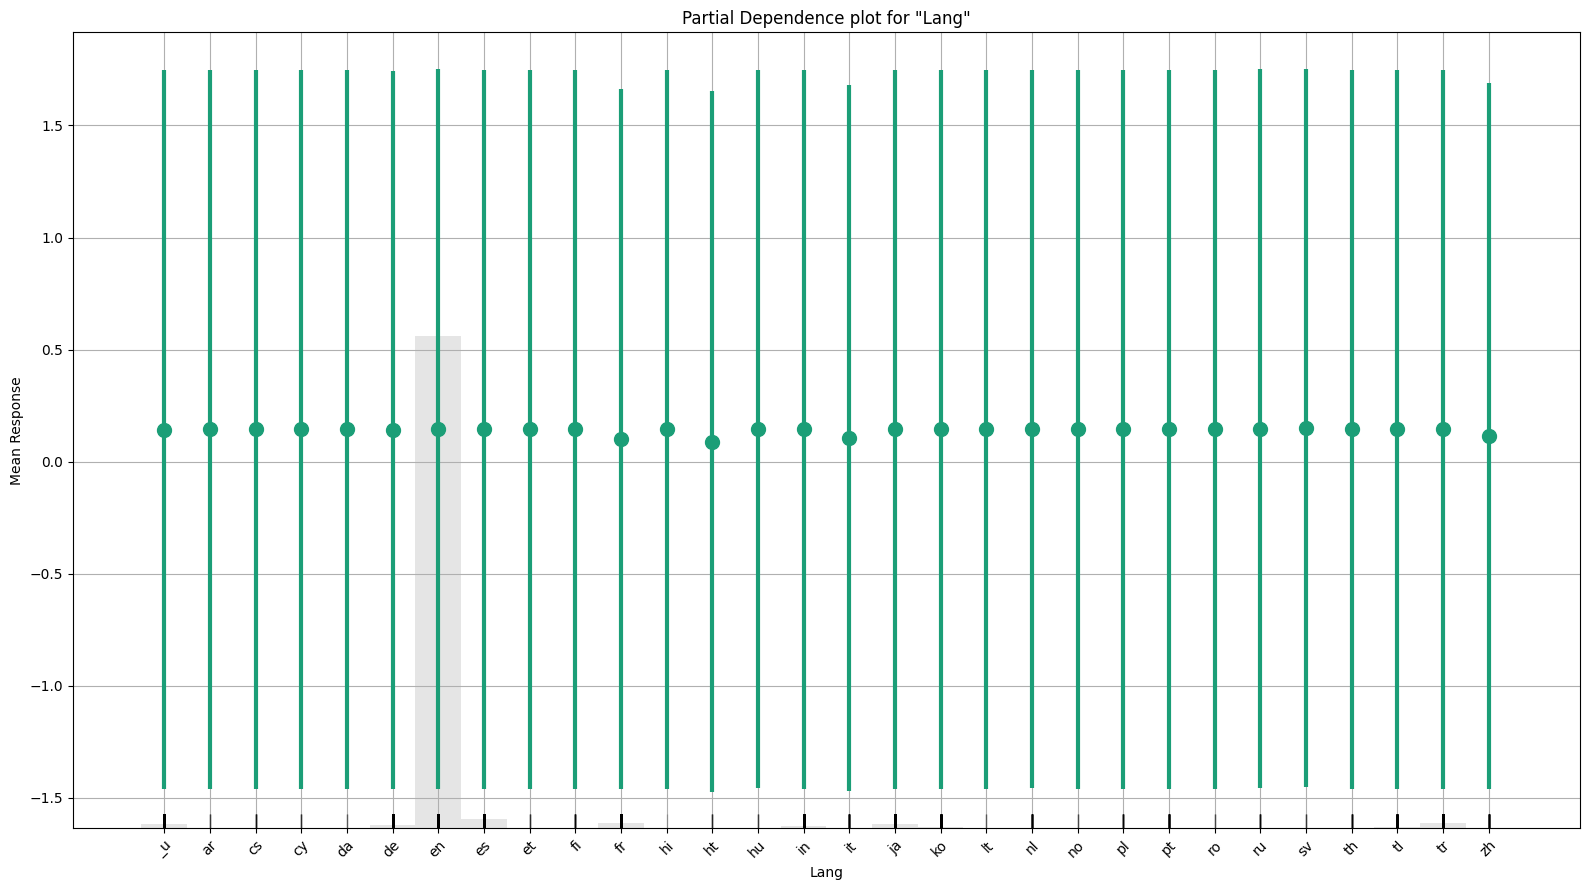

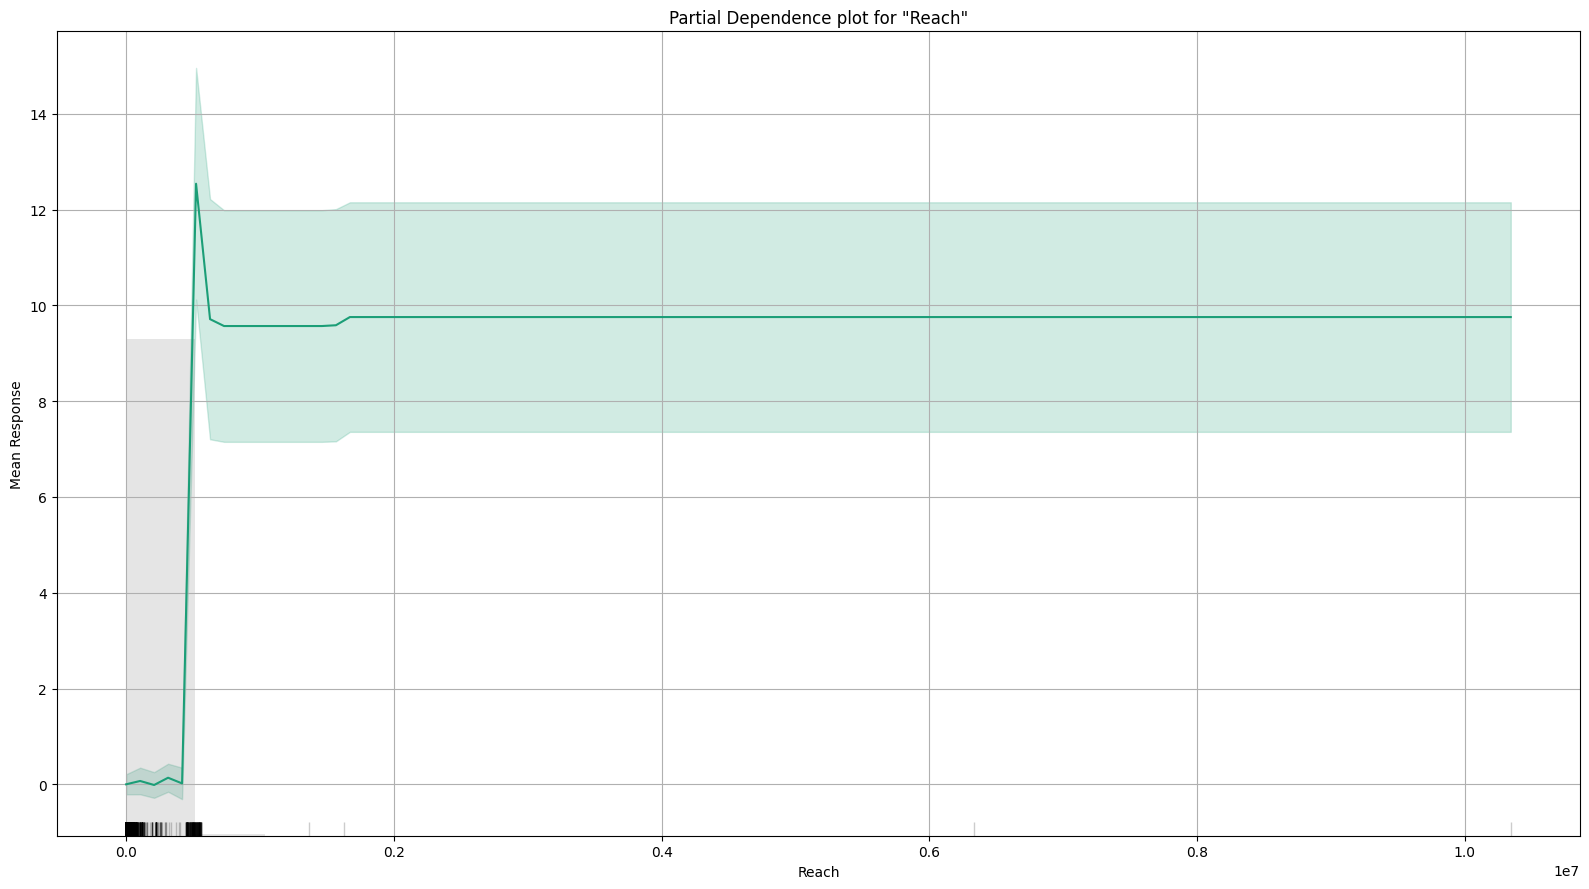

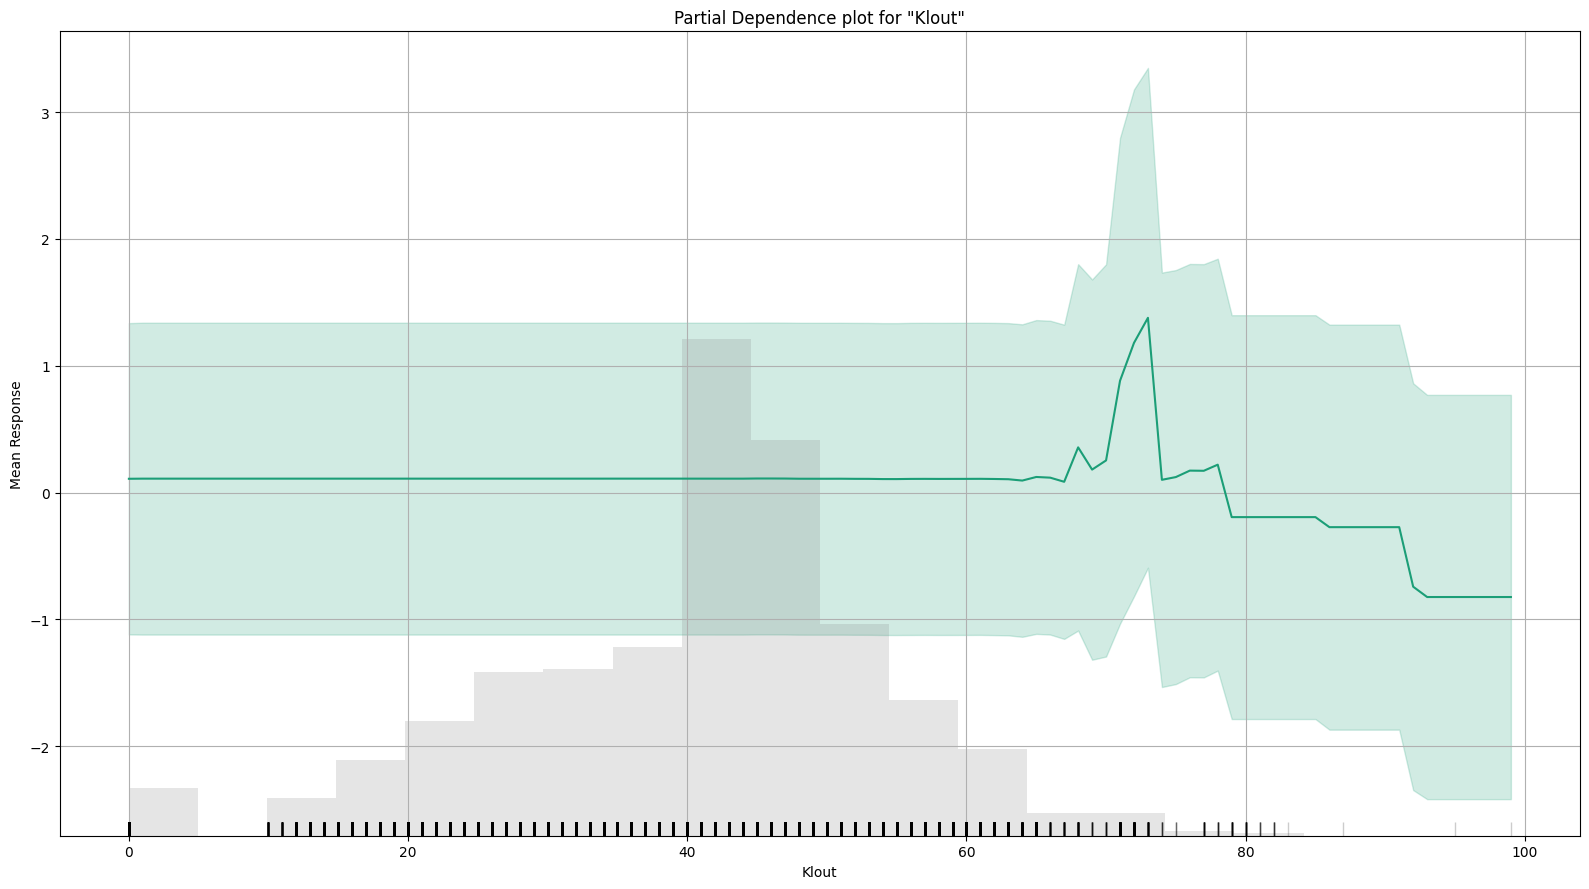

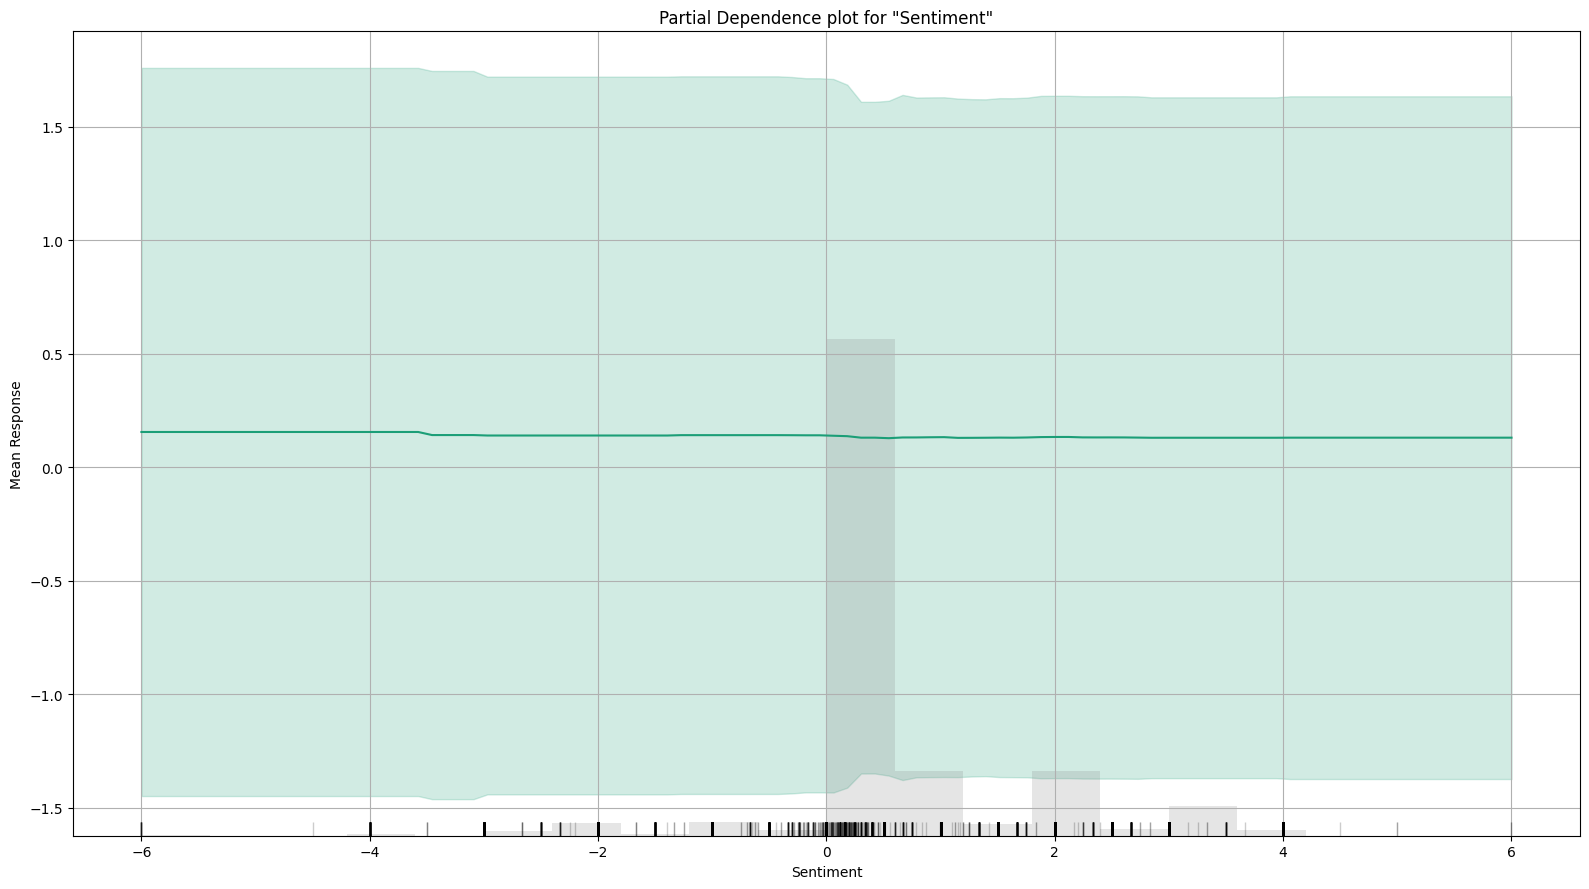

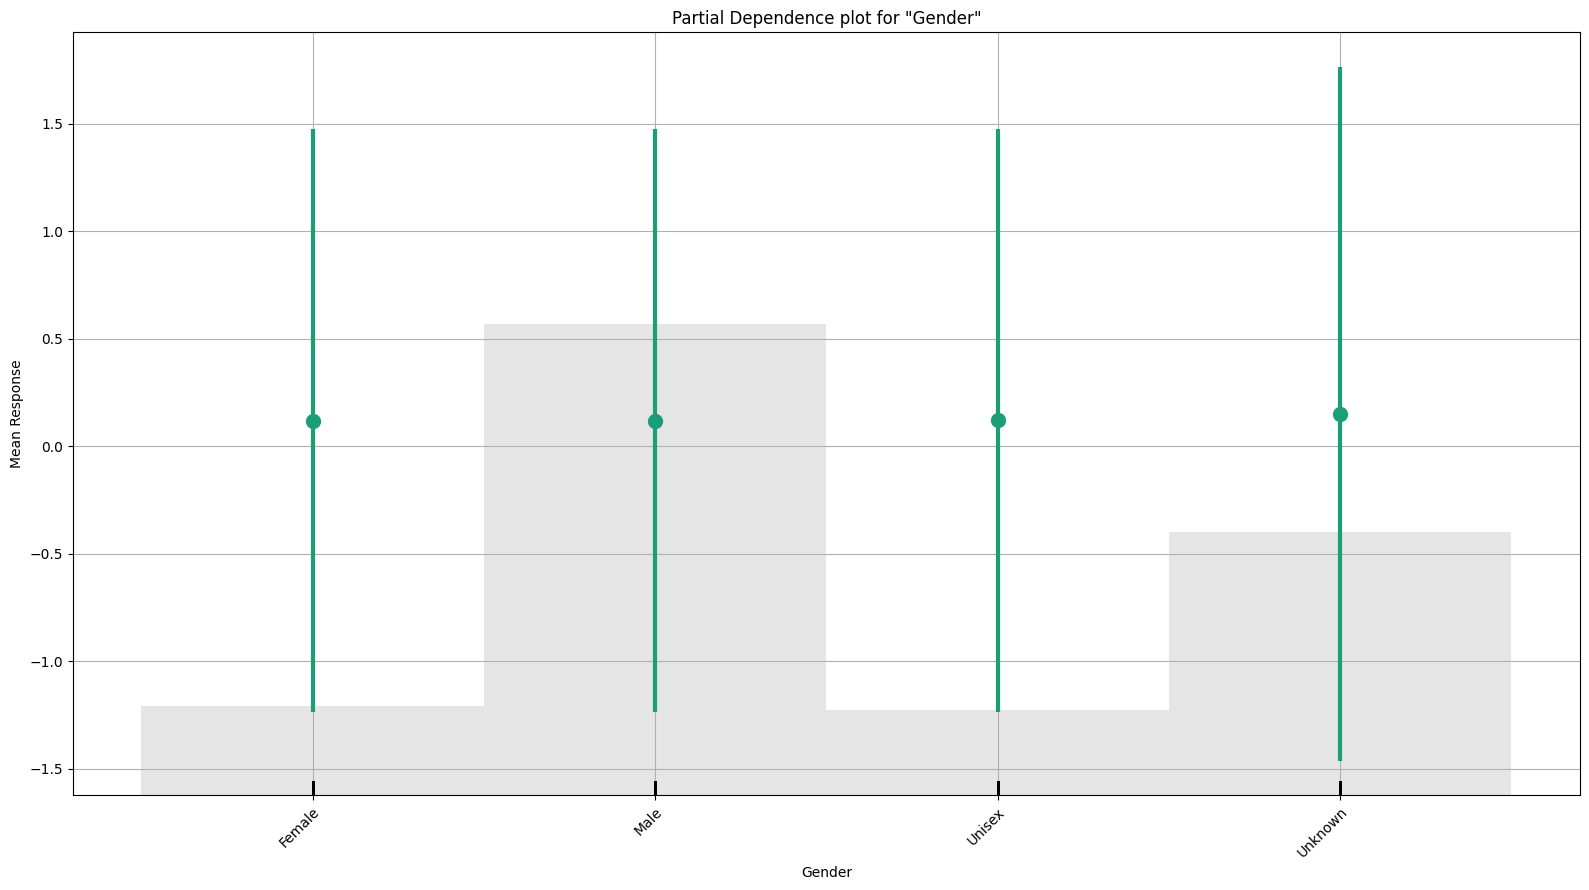

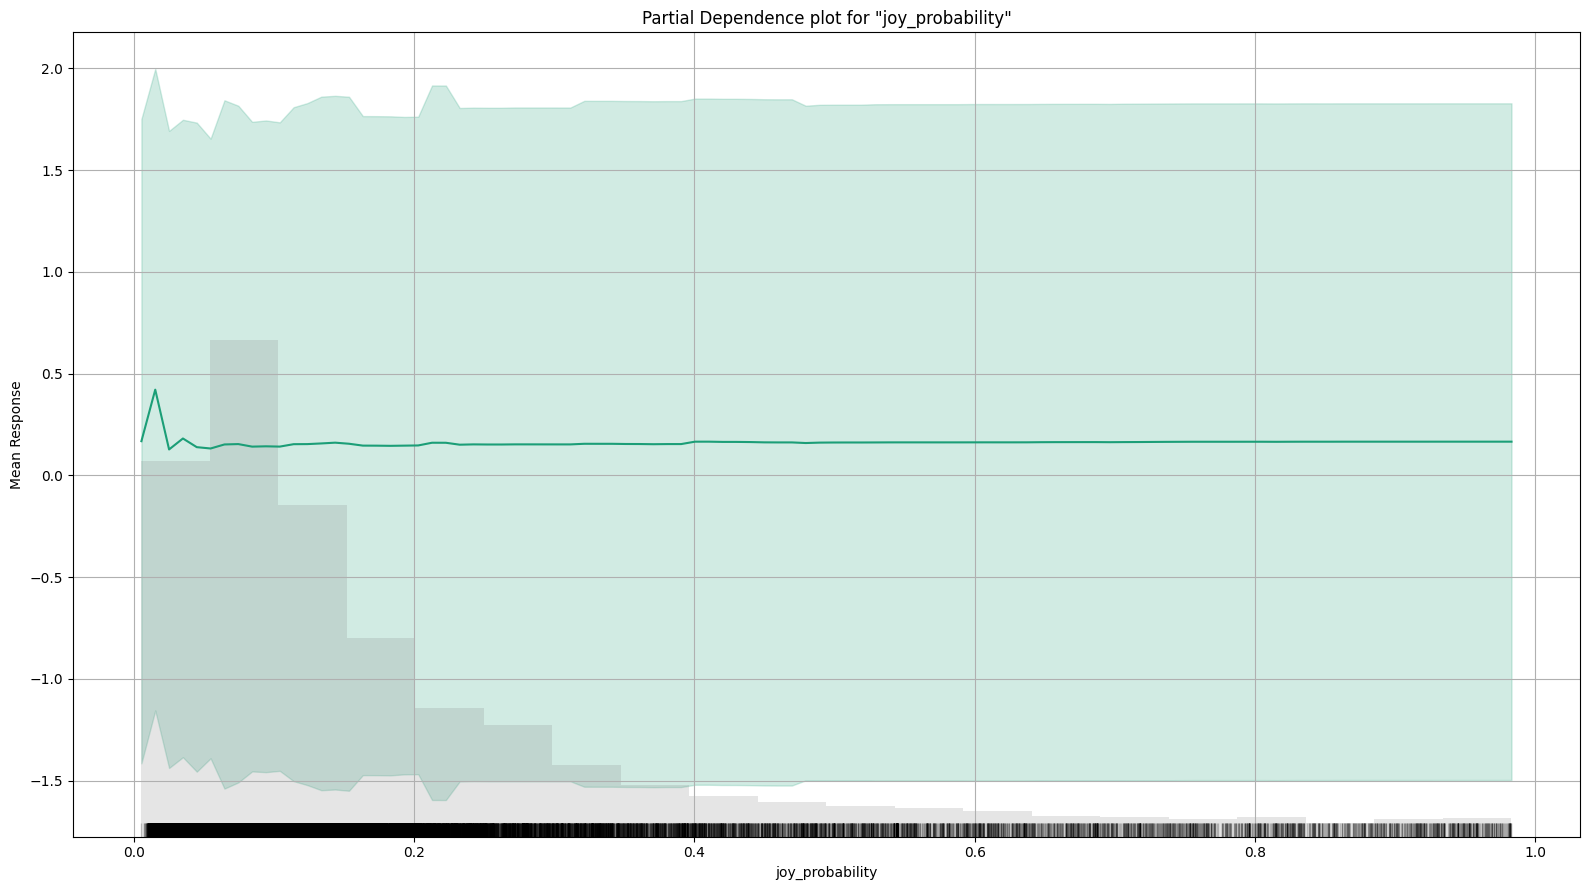

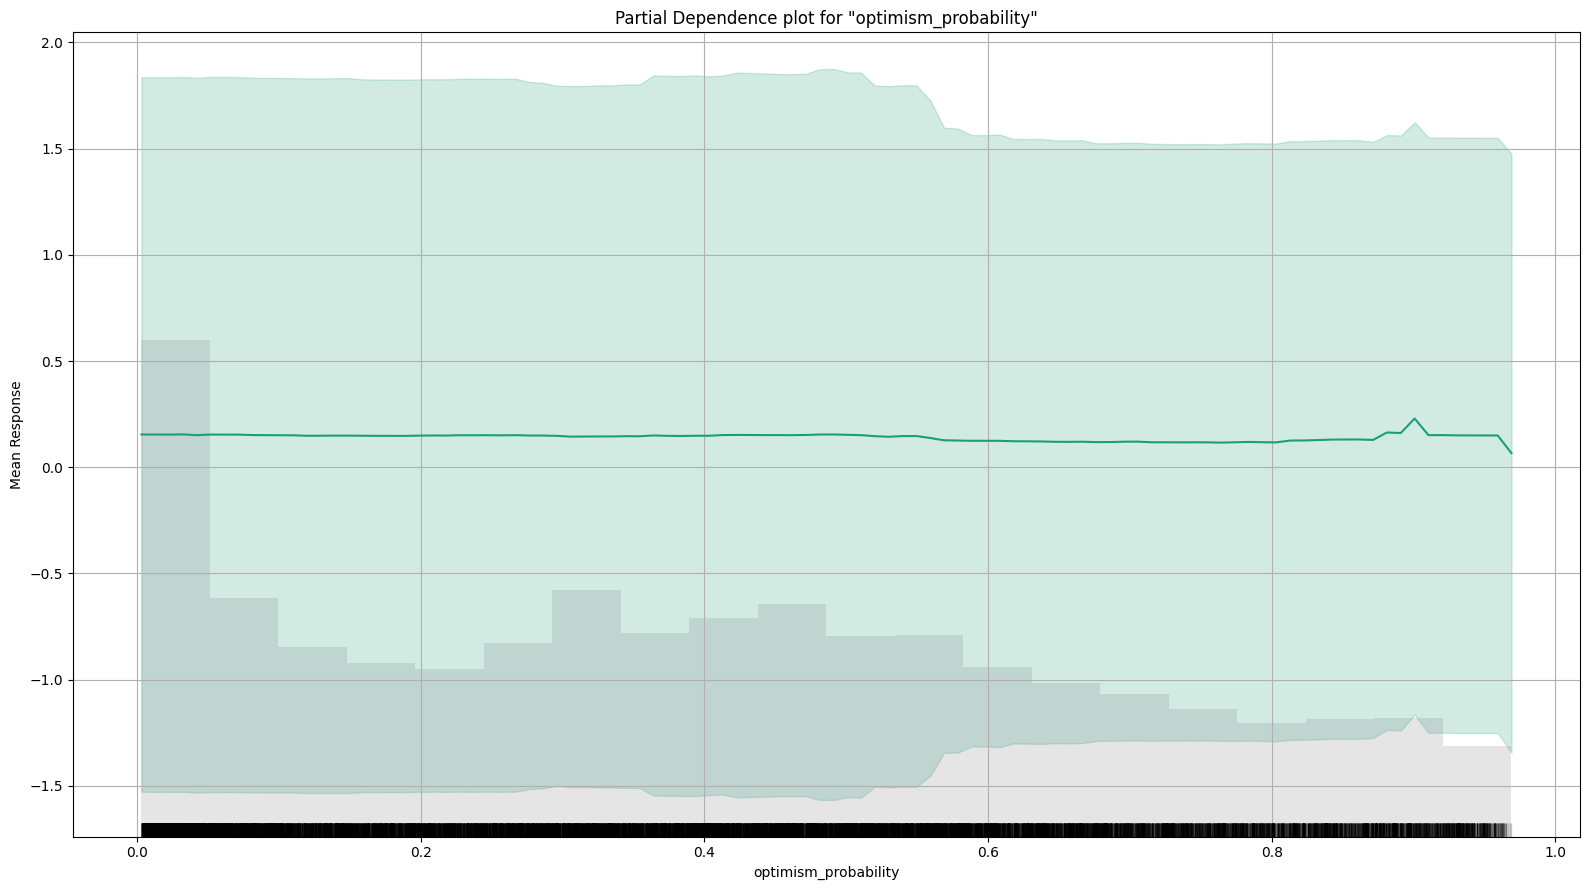

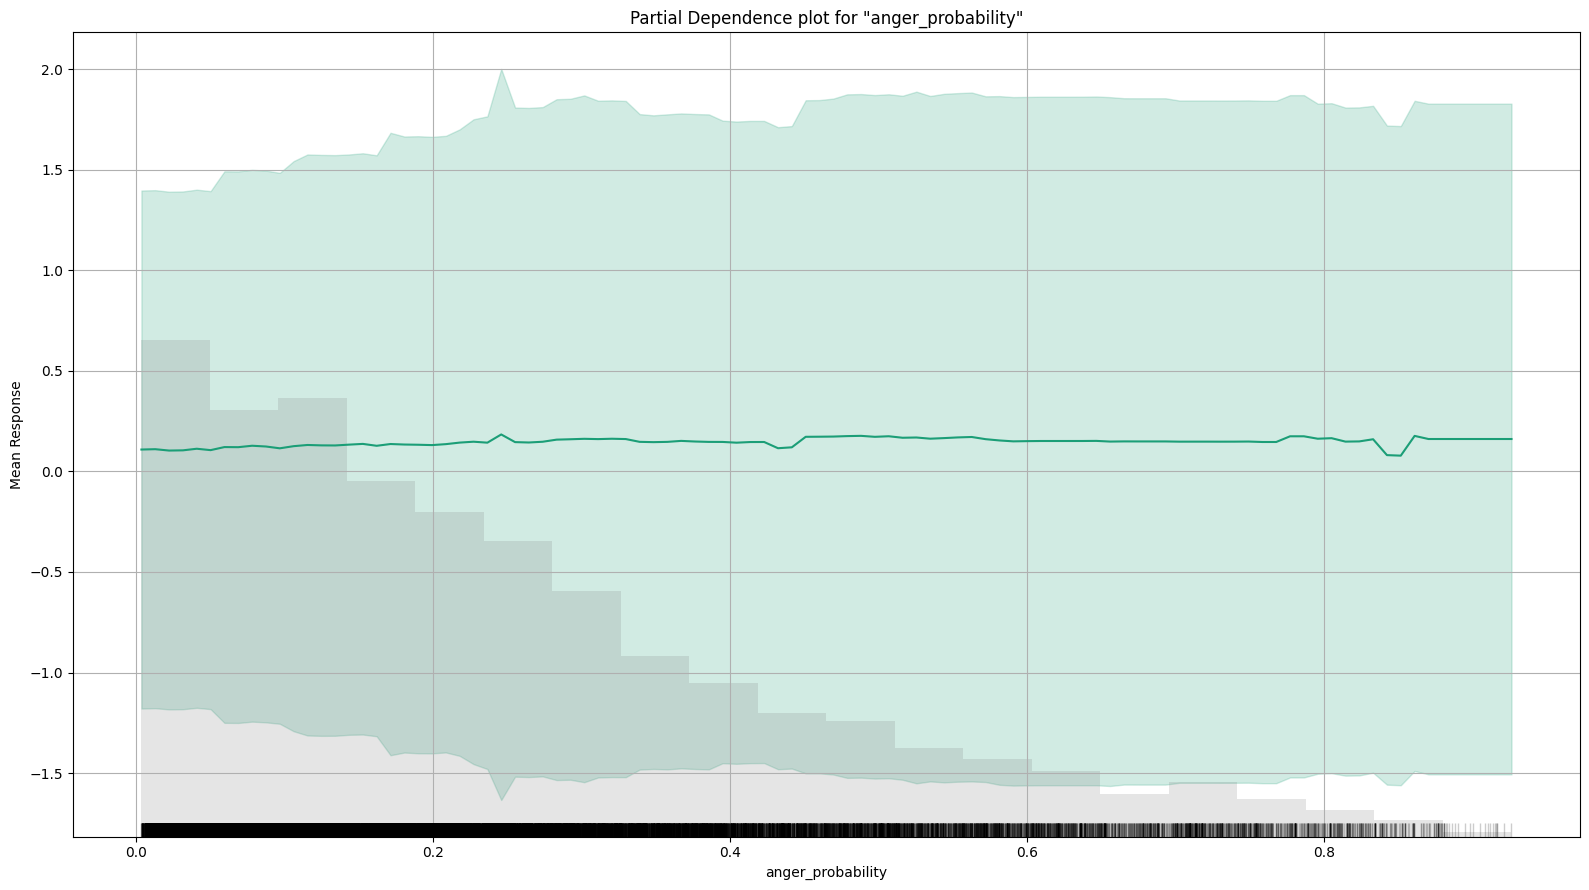

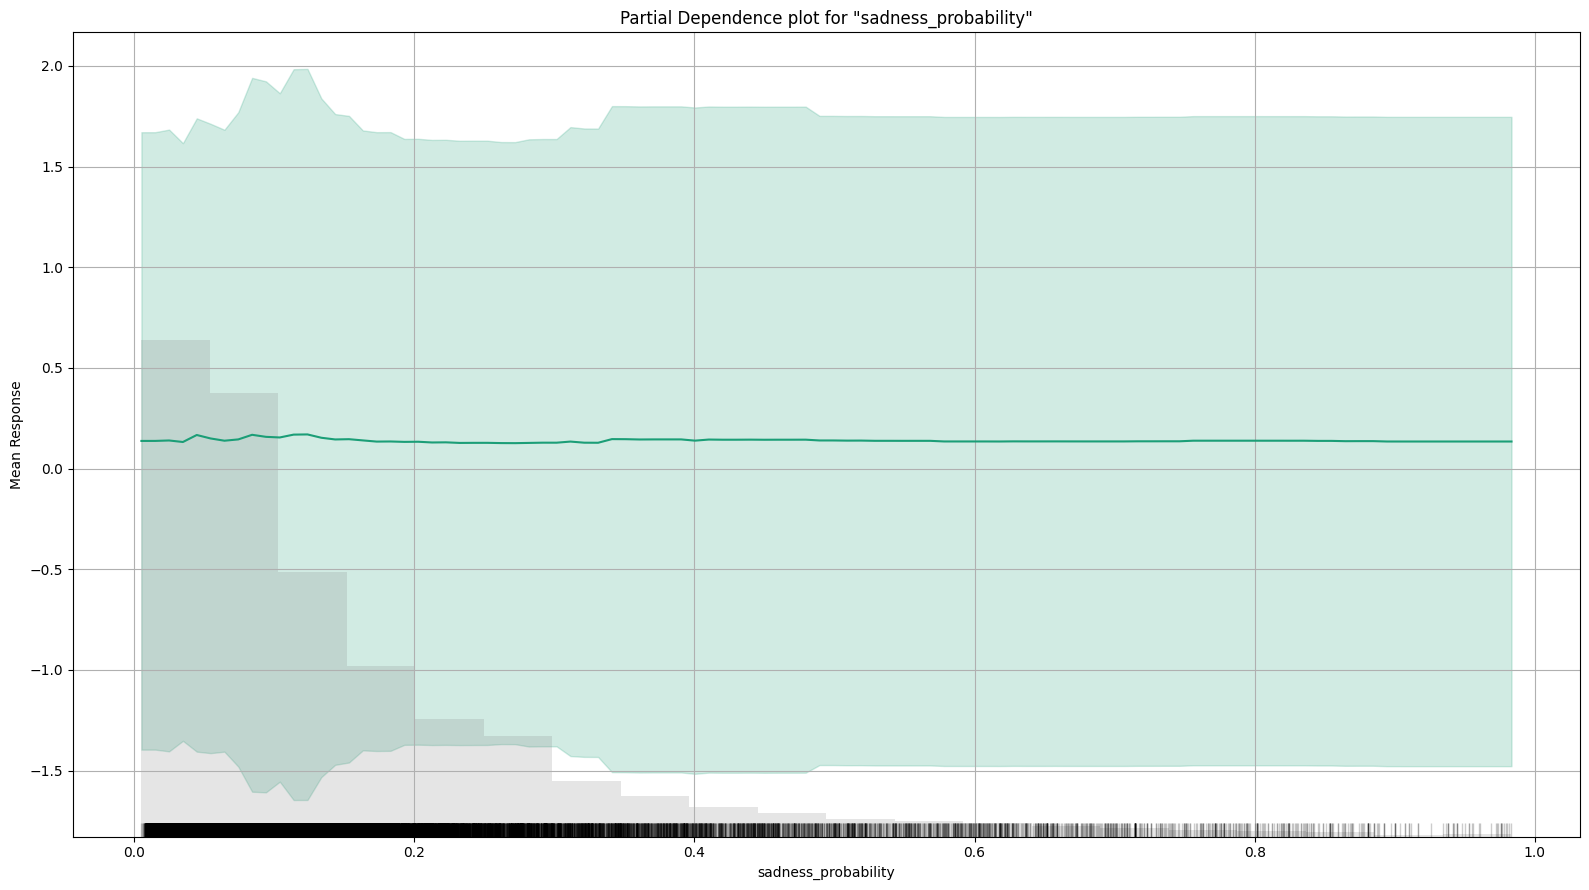

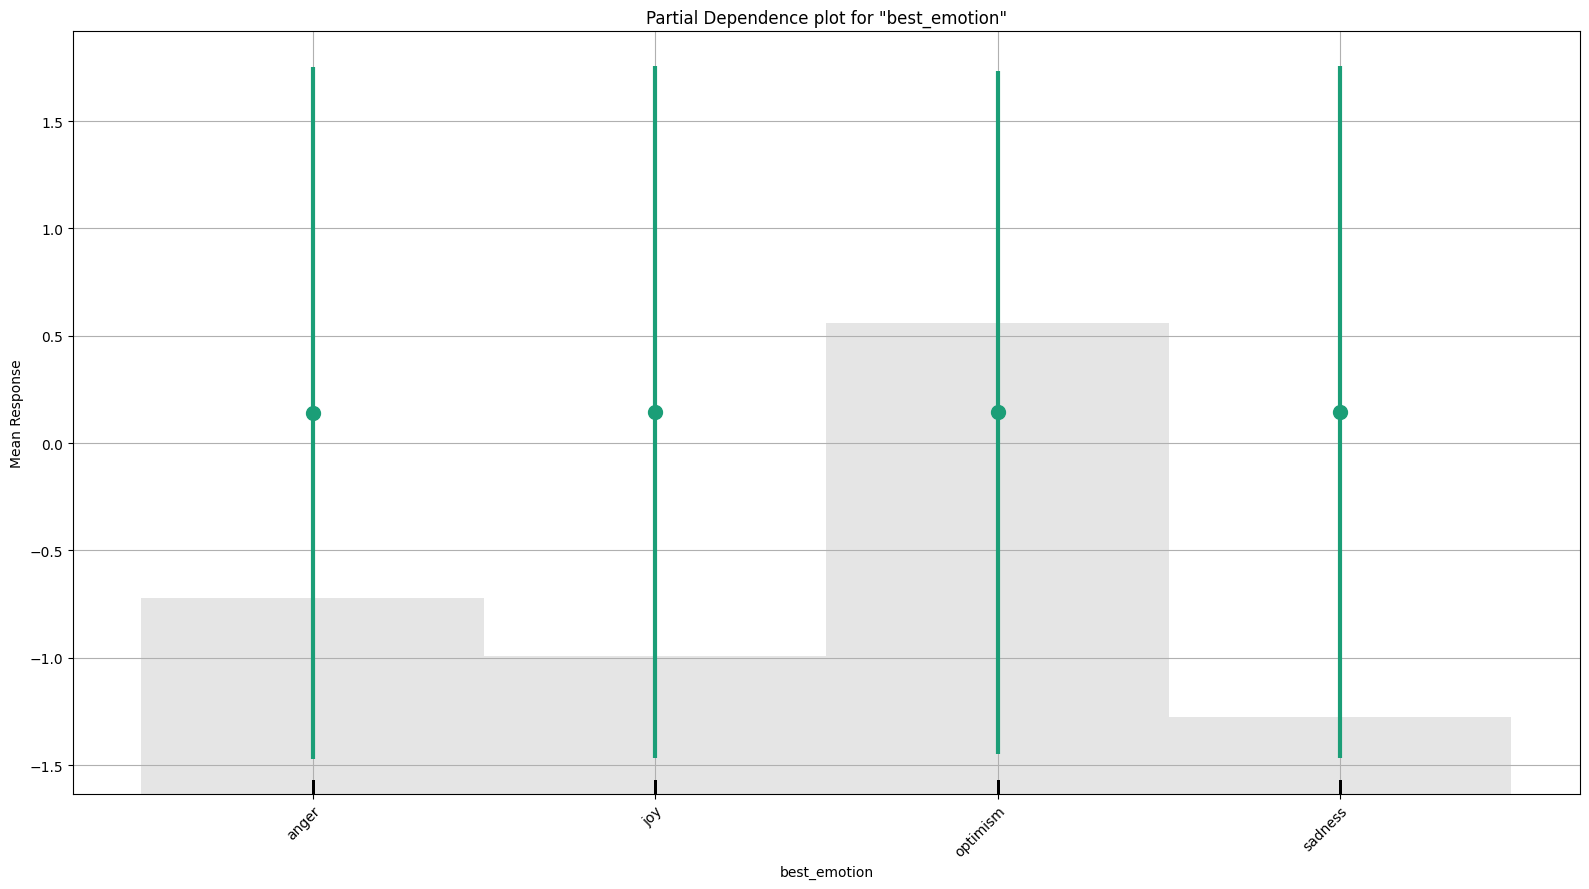

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

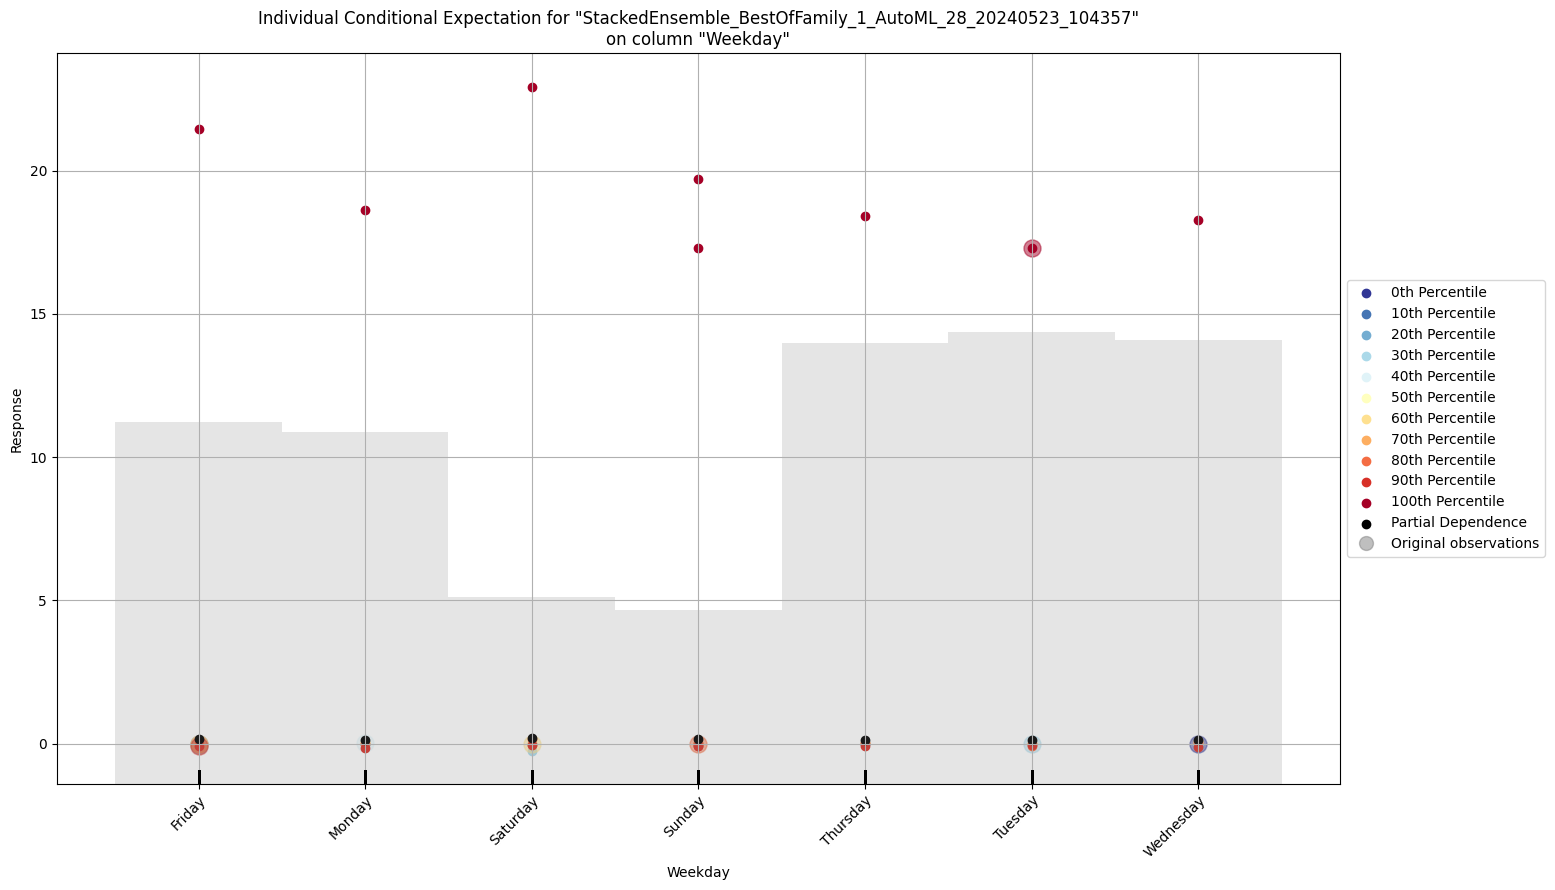

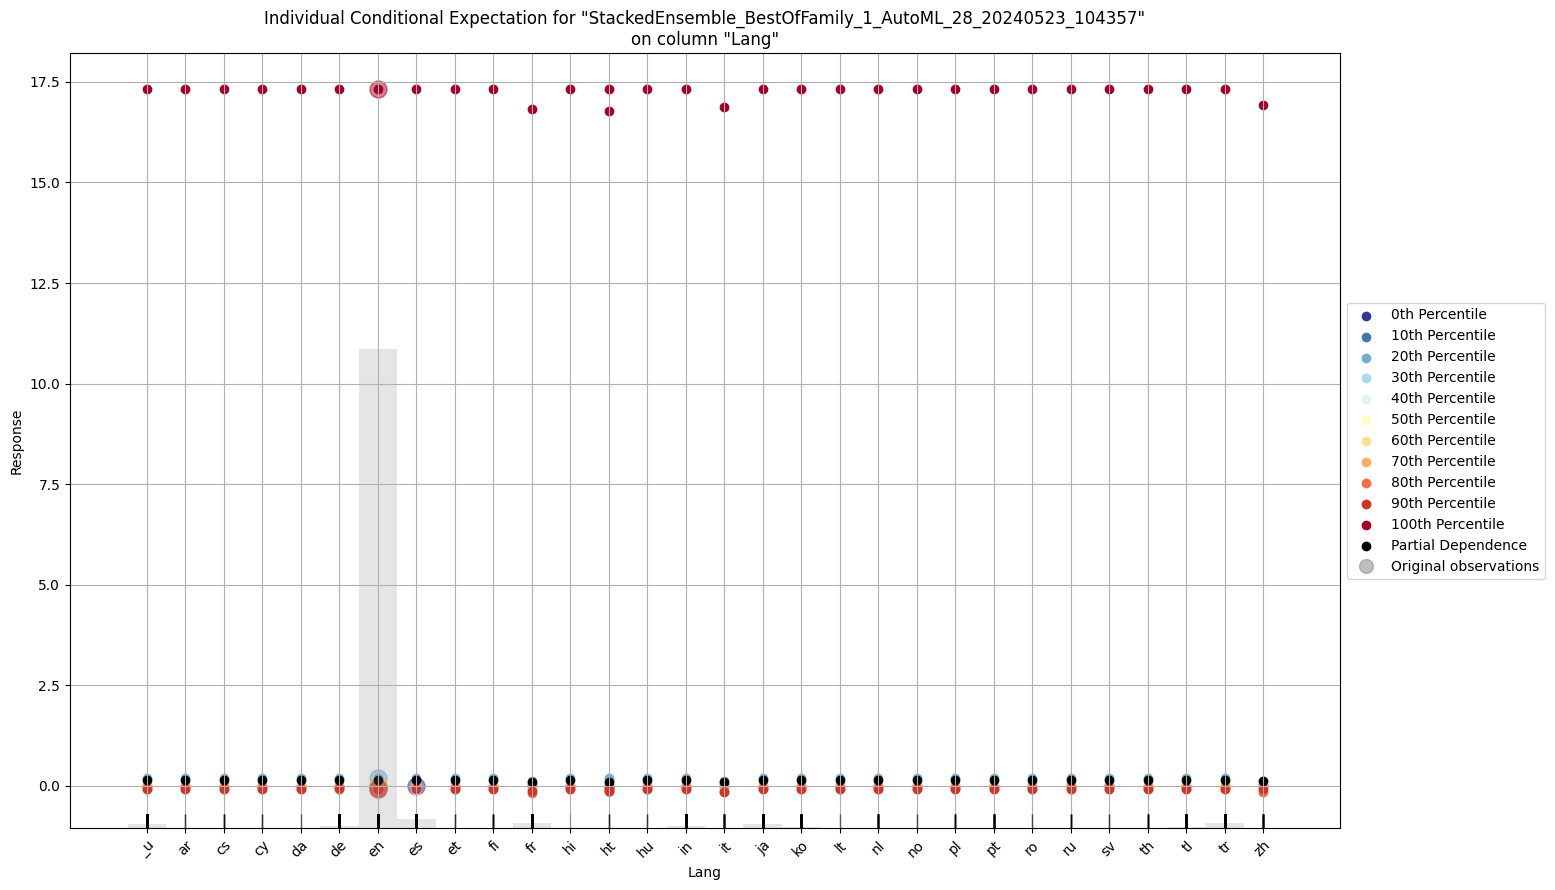

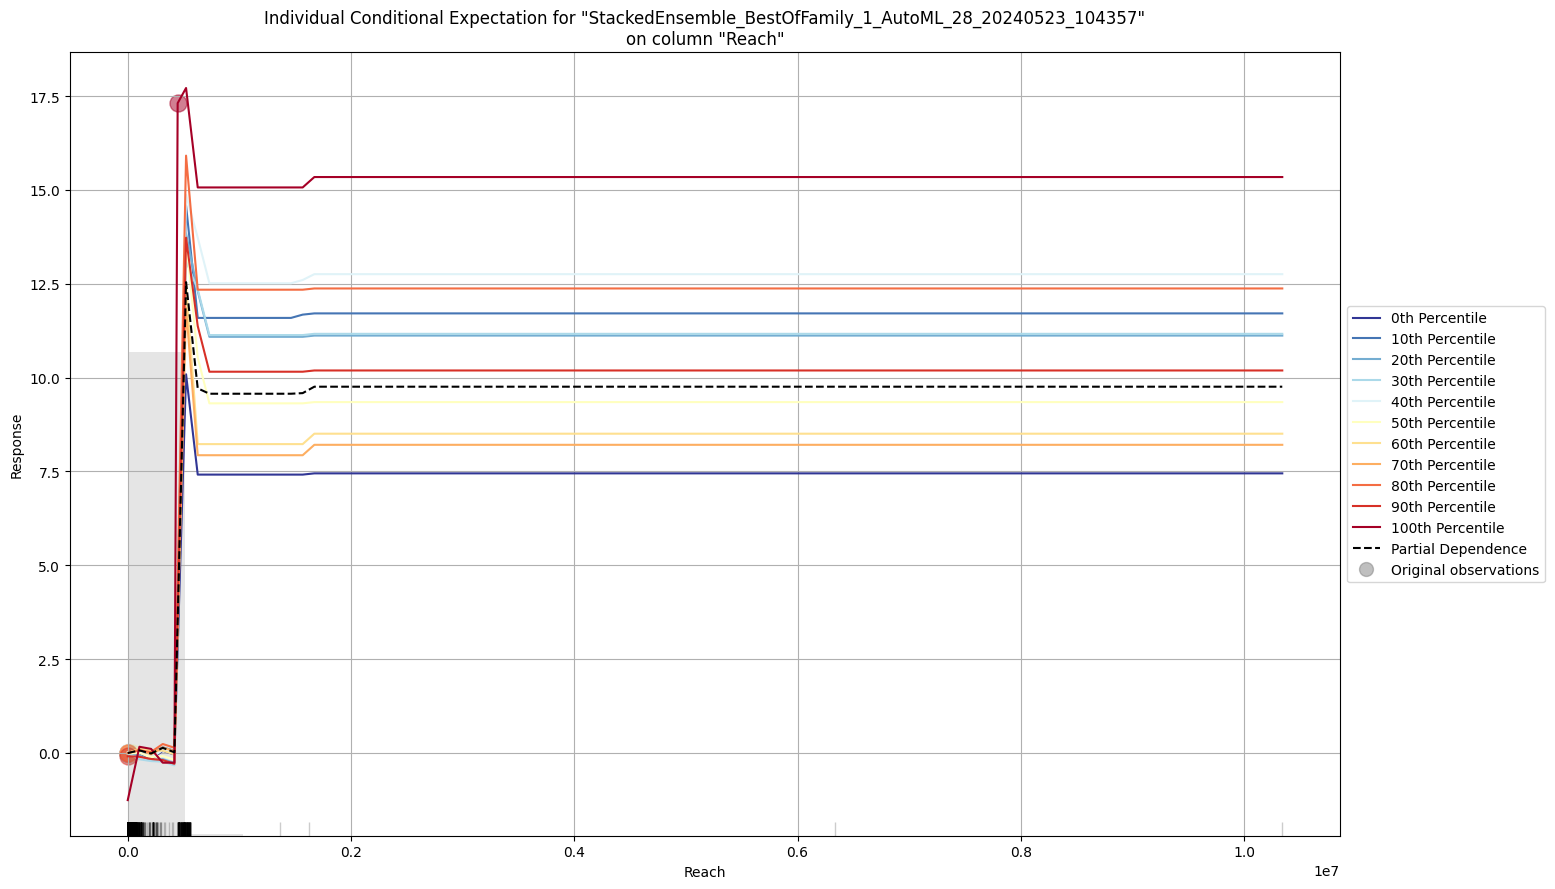

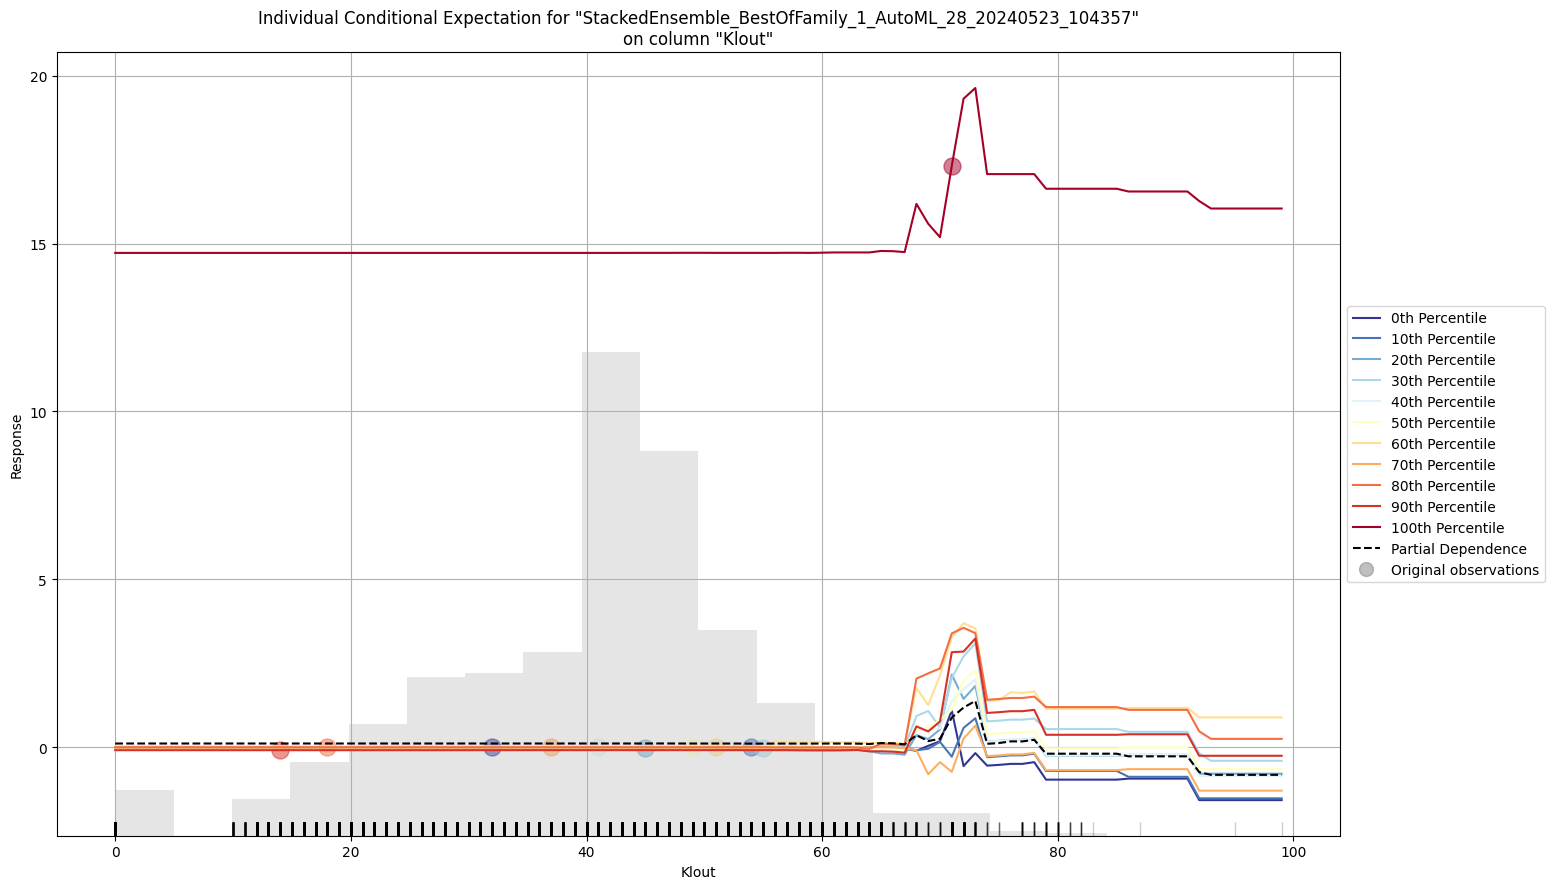

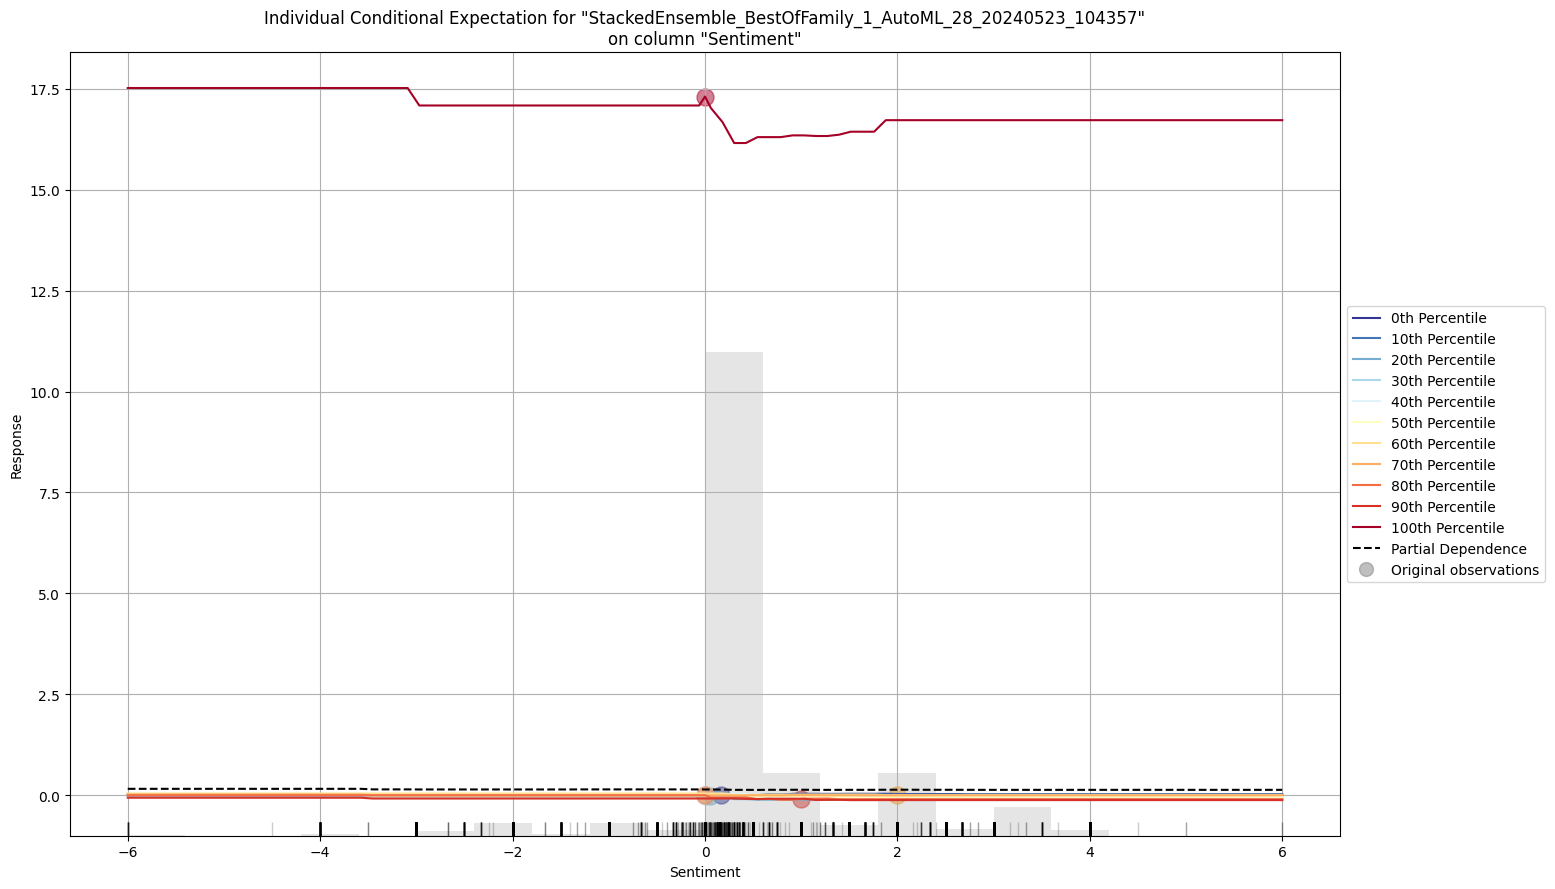

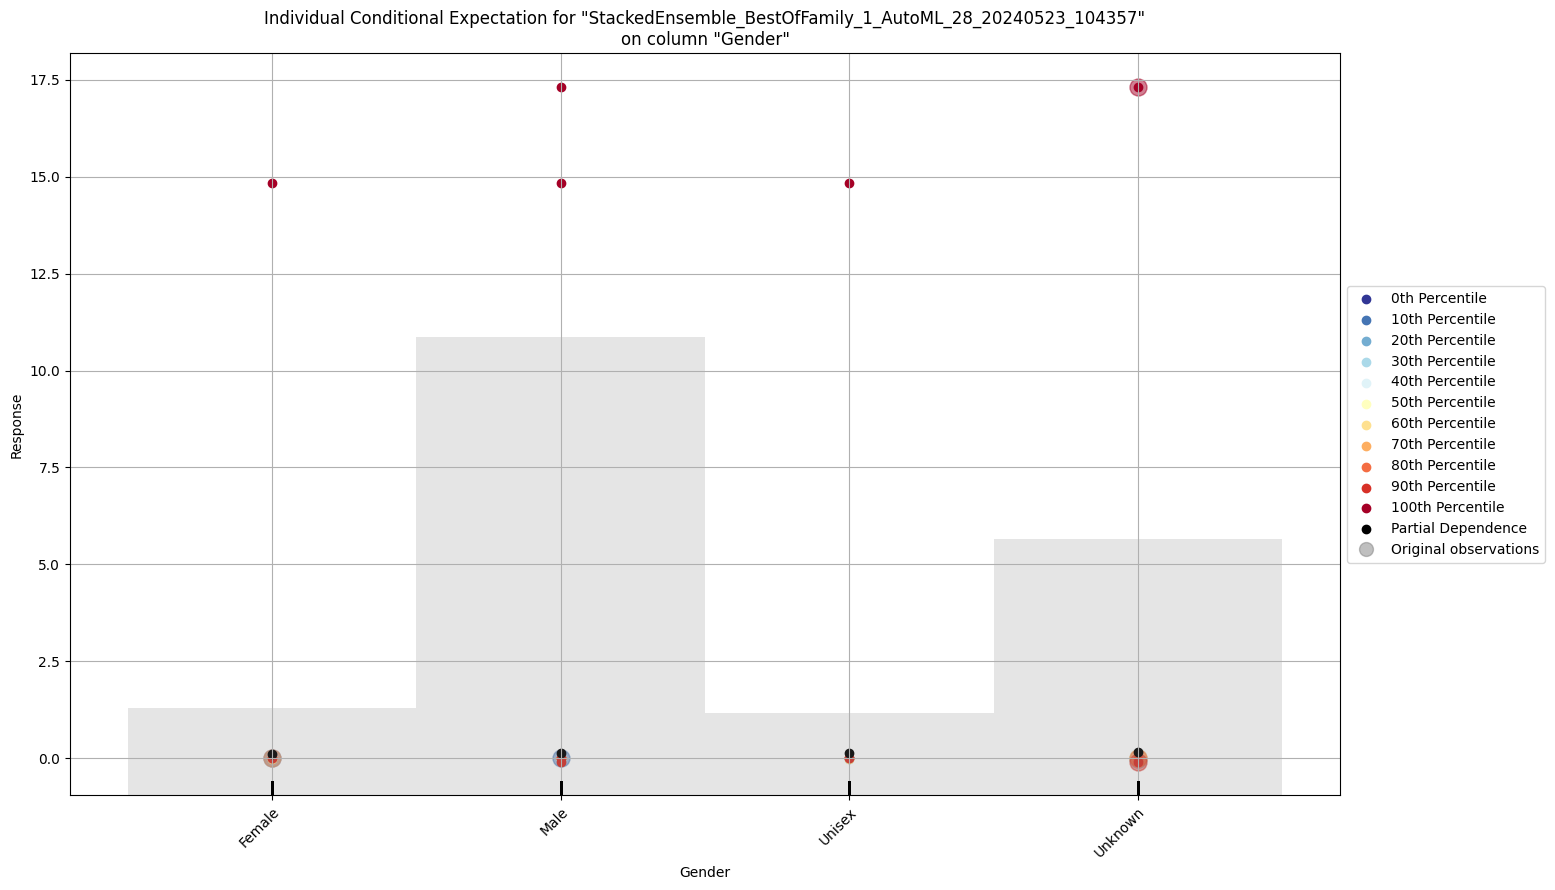

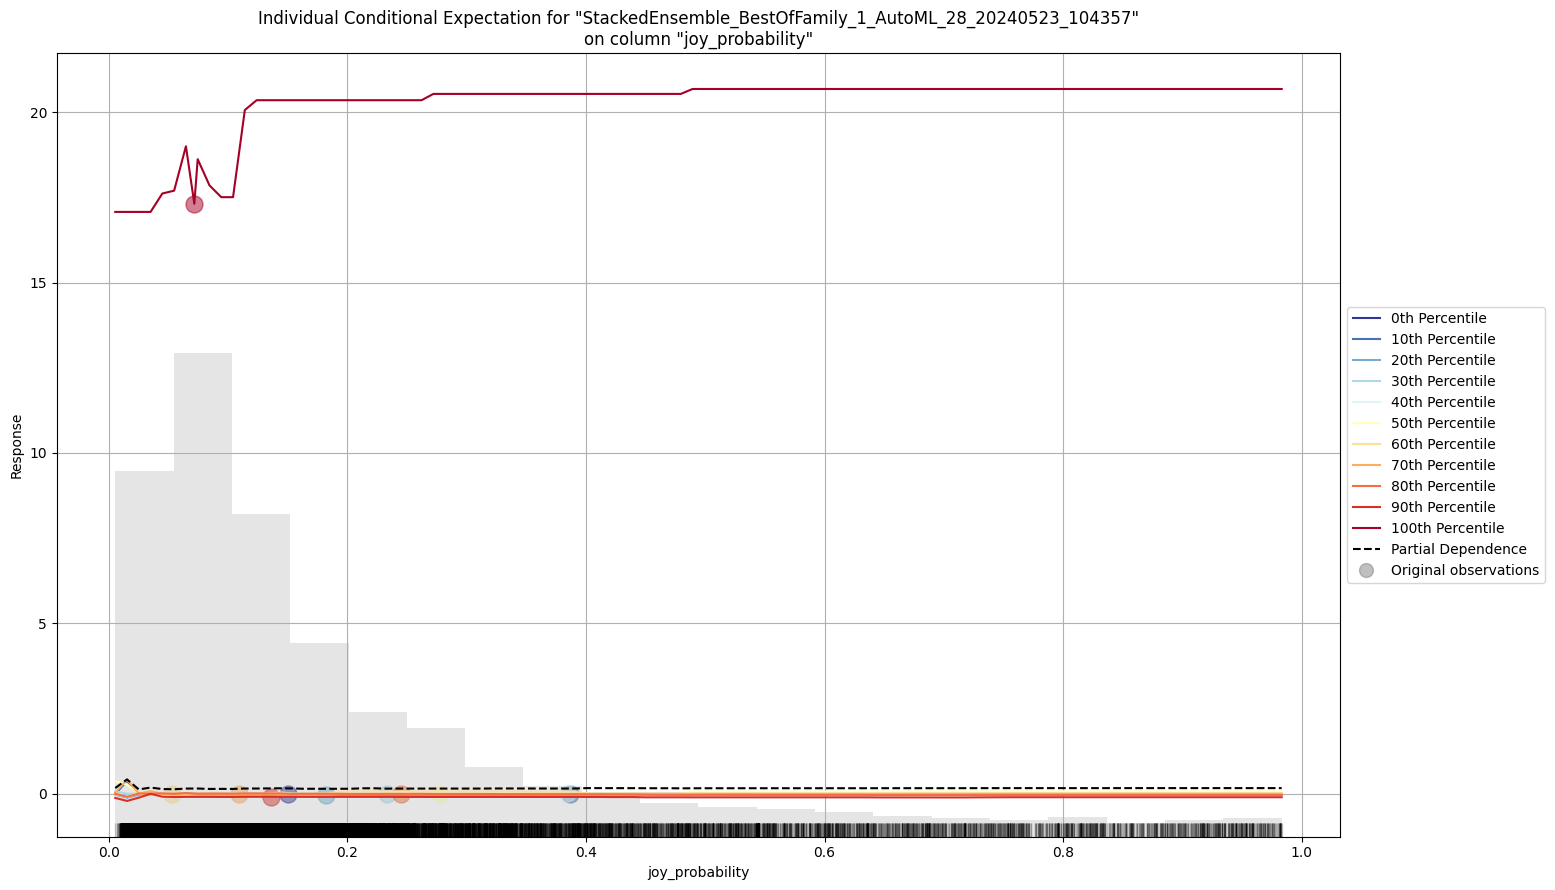

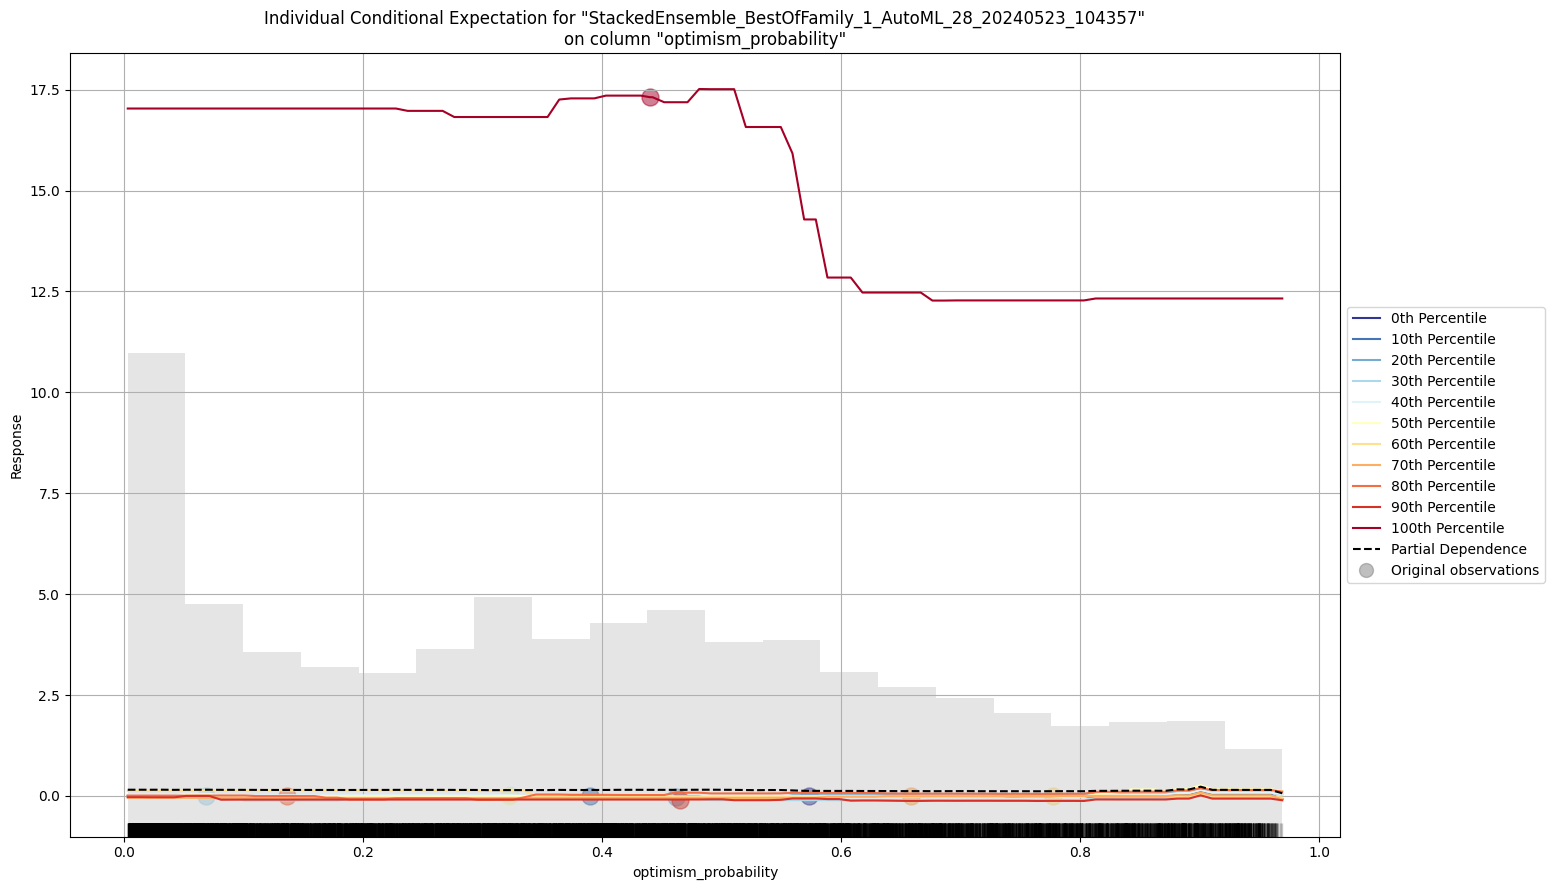

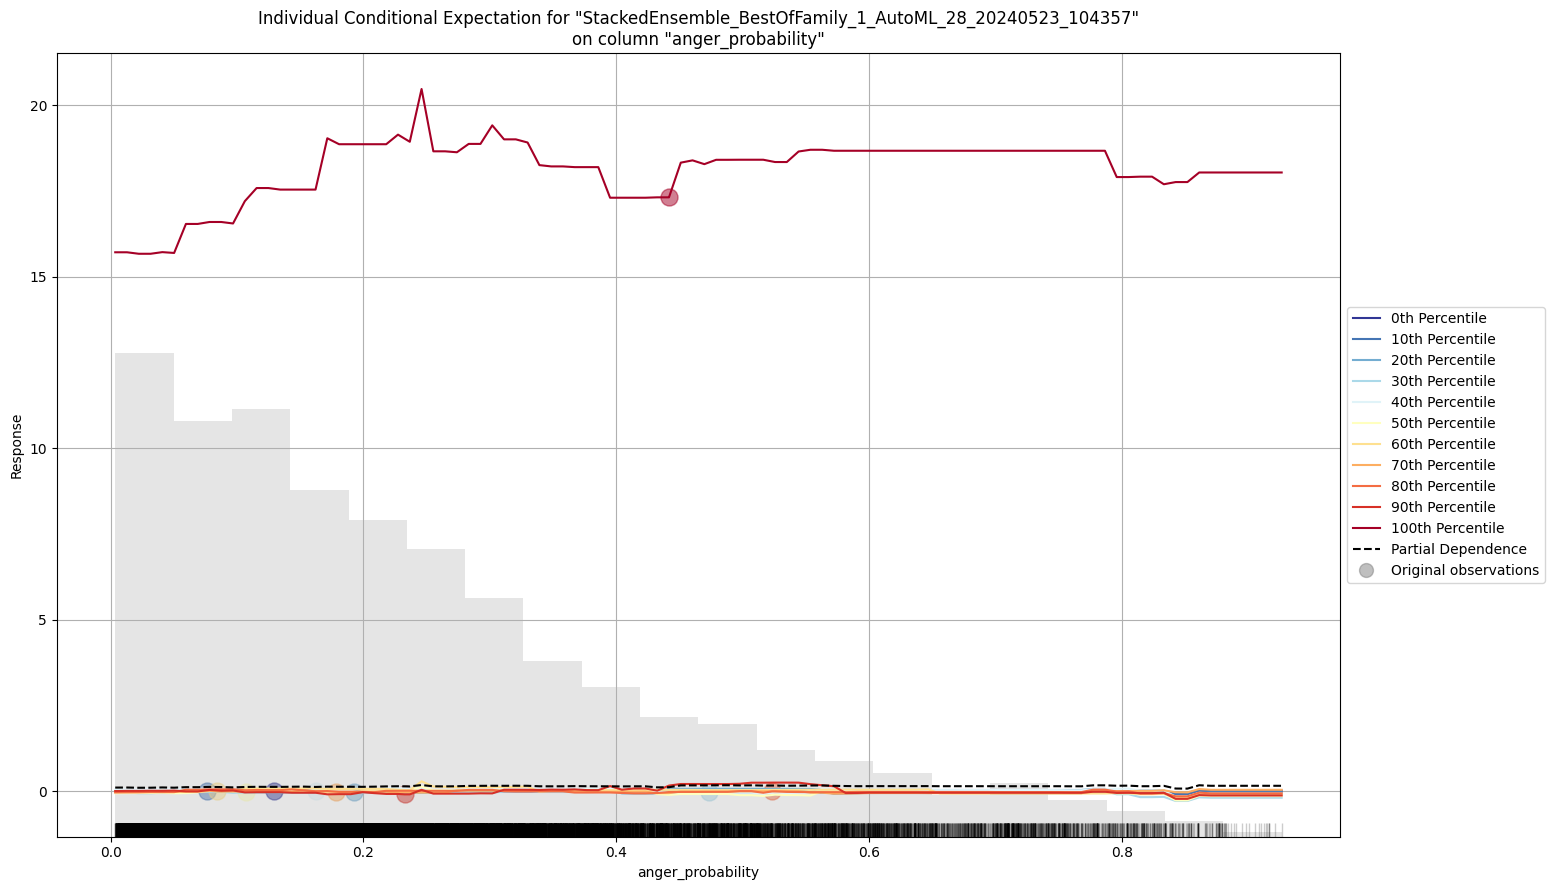

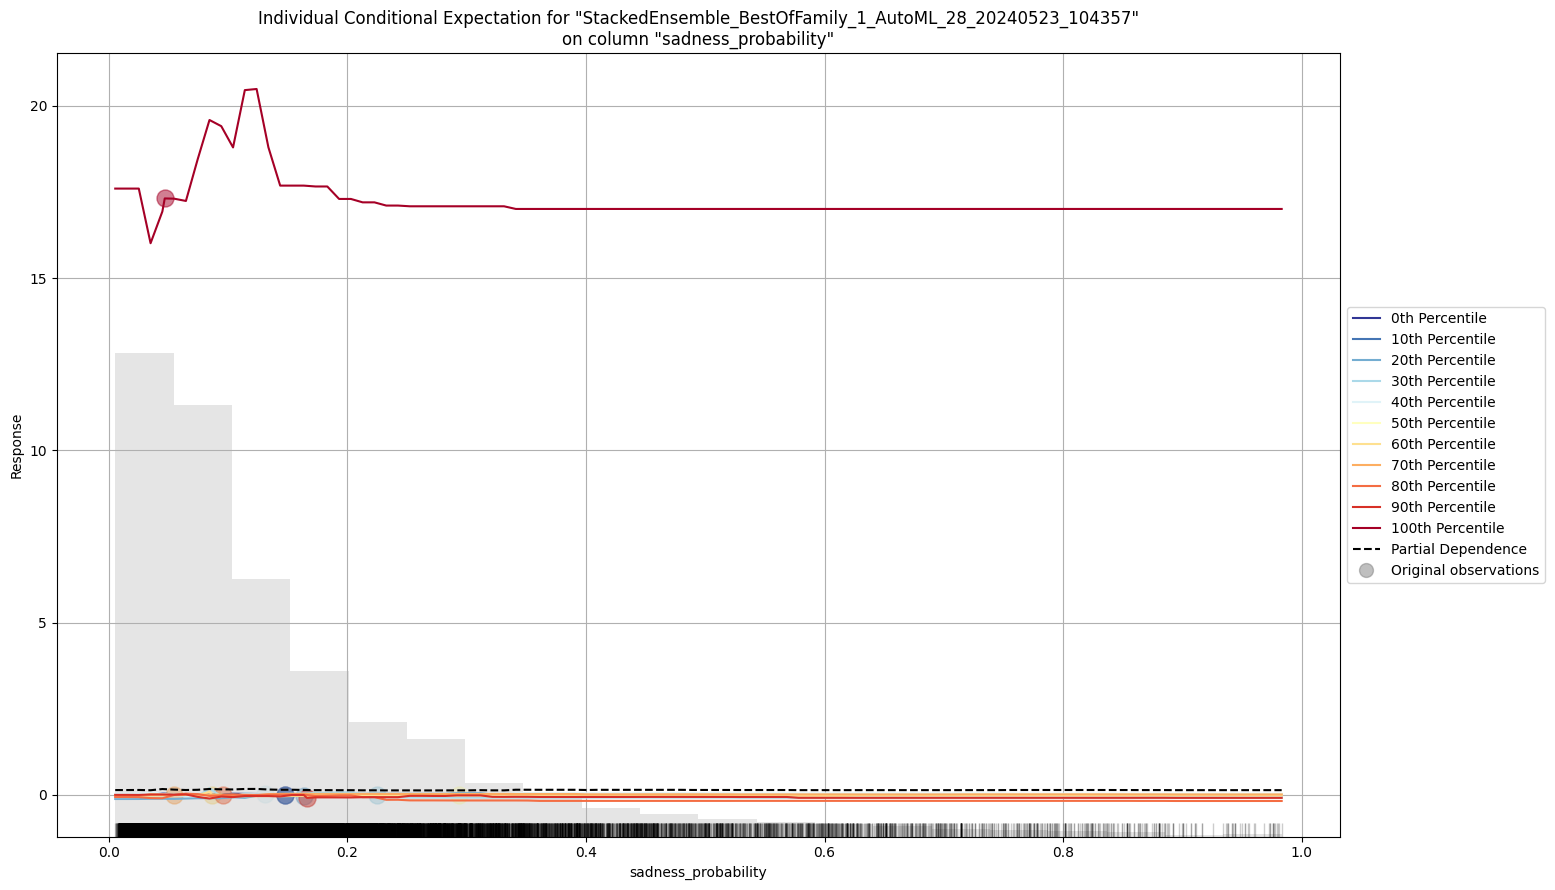

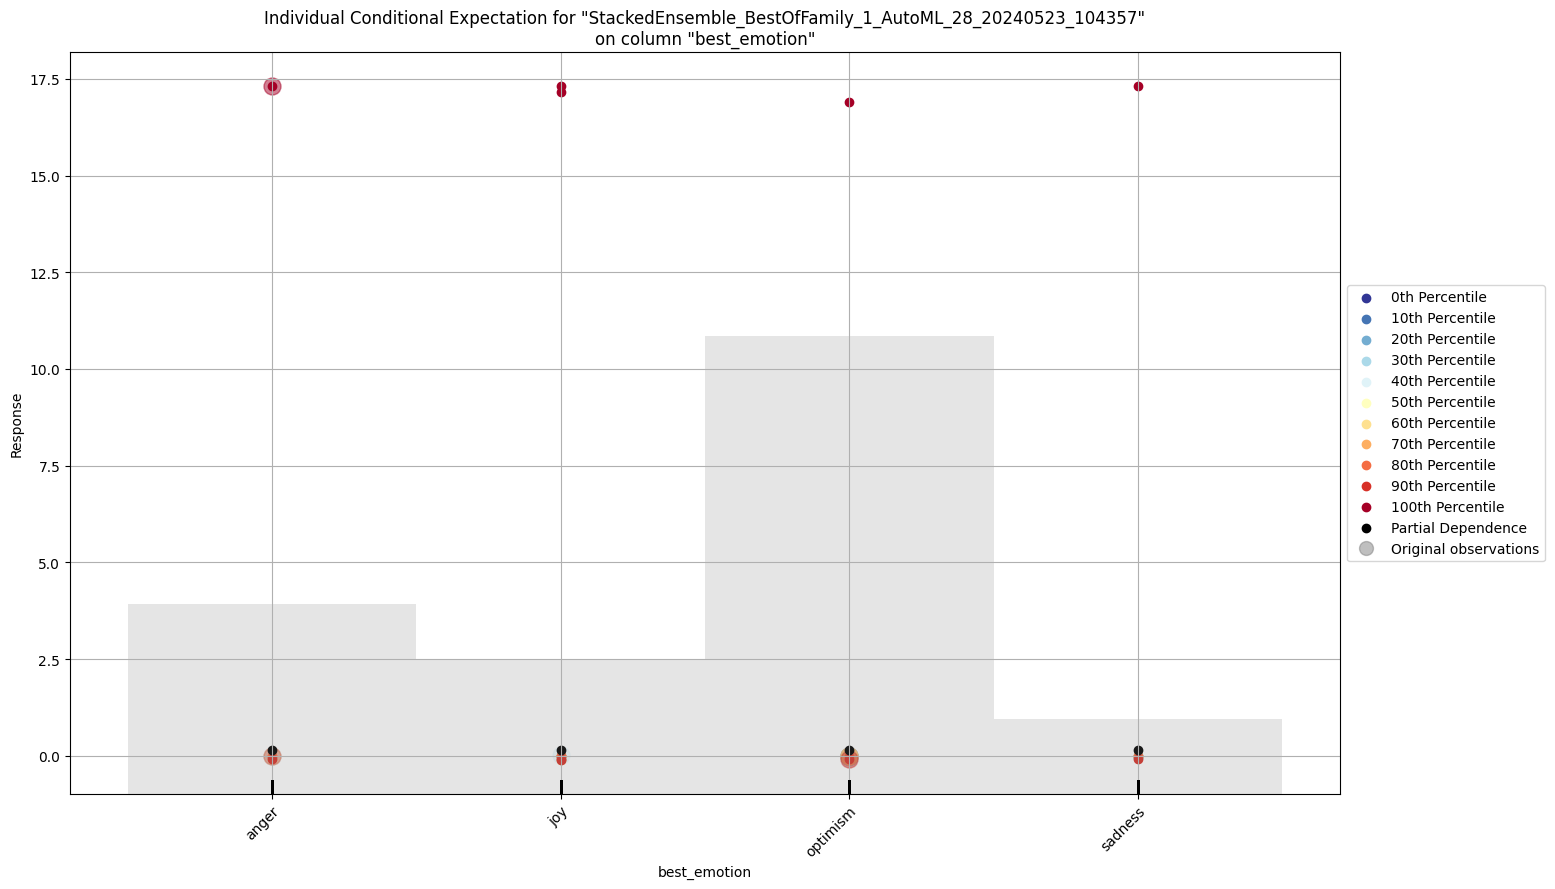

In [17]:
%matplotlib inline
# model.explain for likes
best_model_likes.explain(valid,render=True)


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

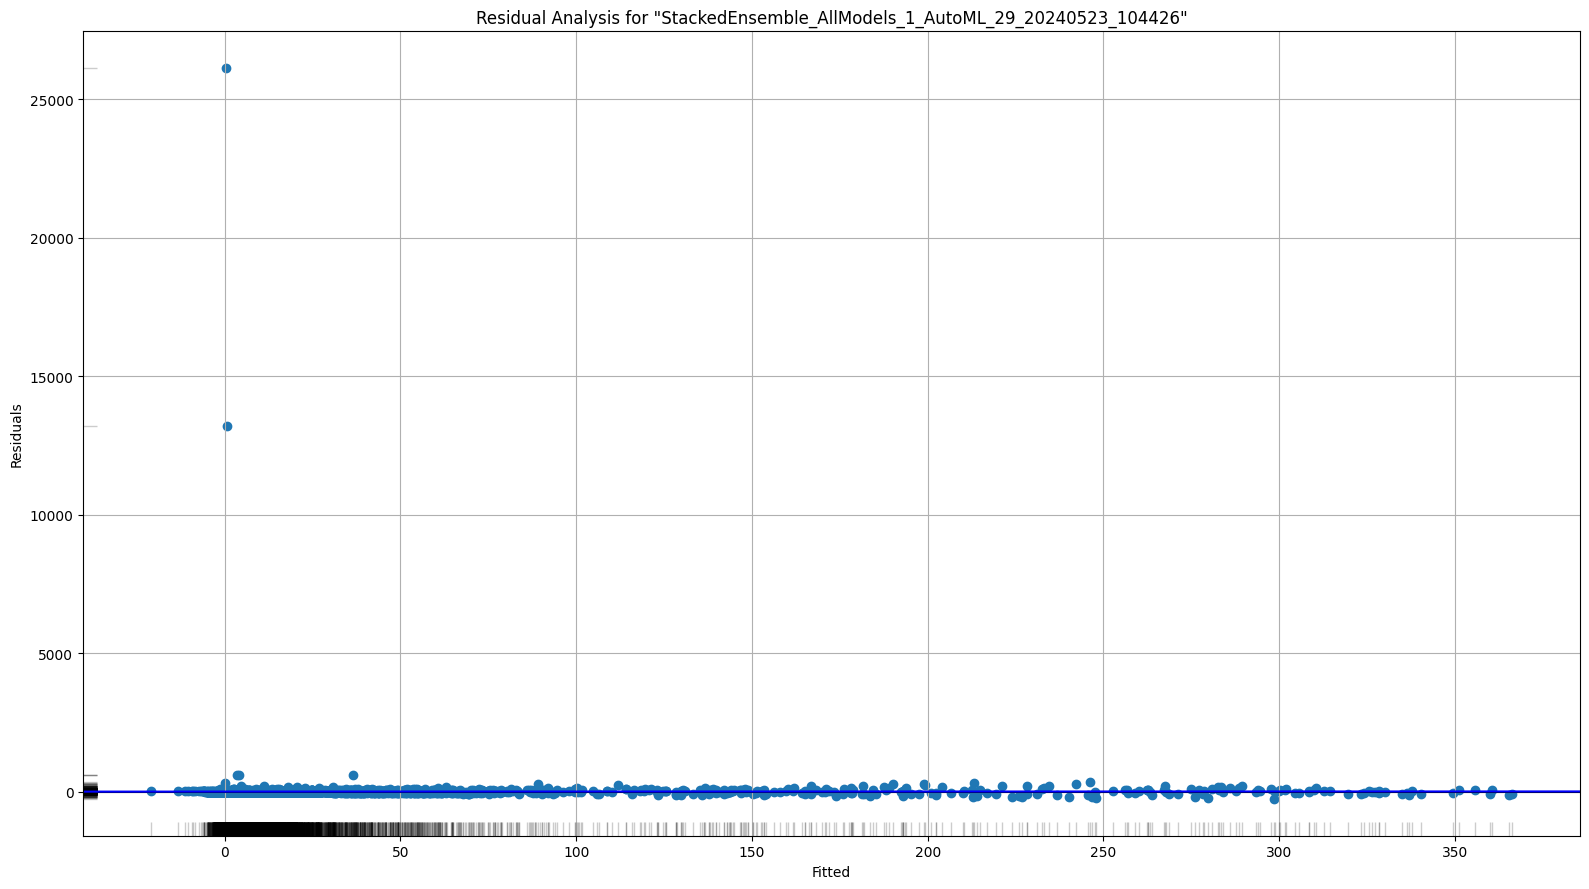

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

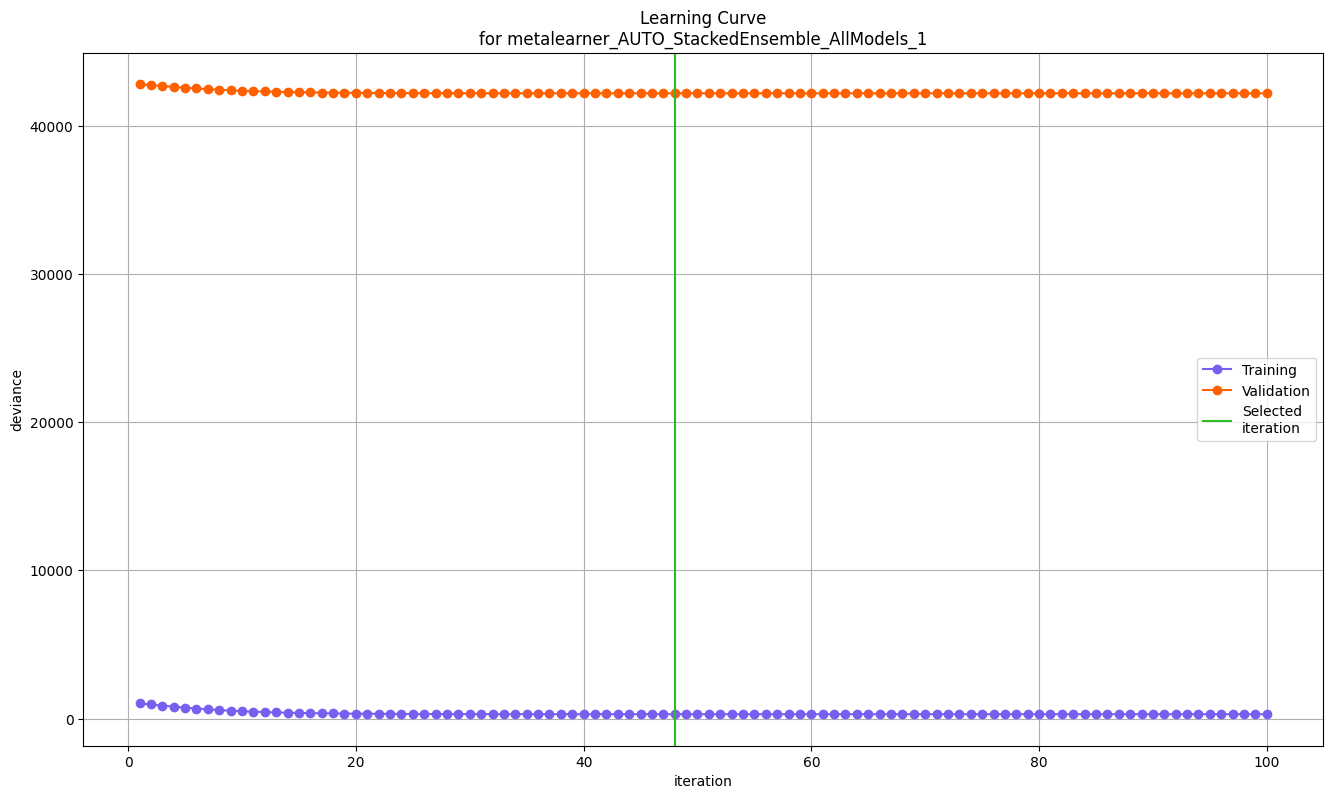

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

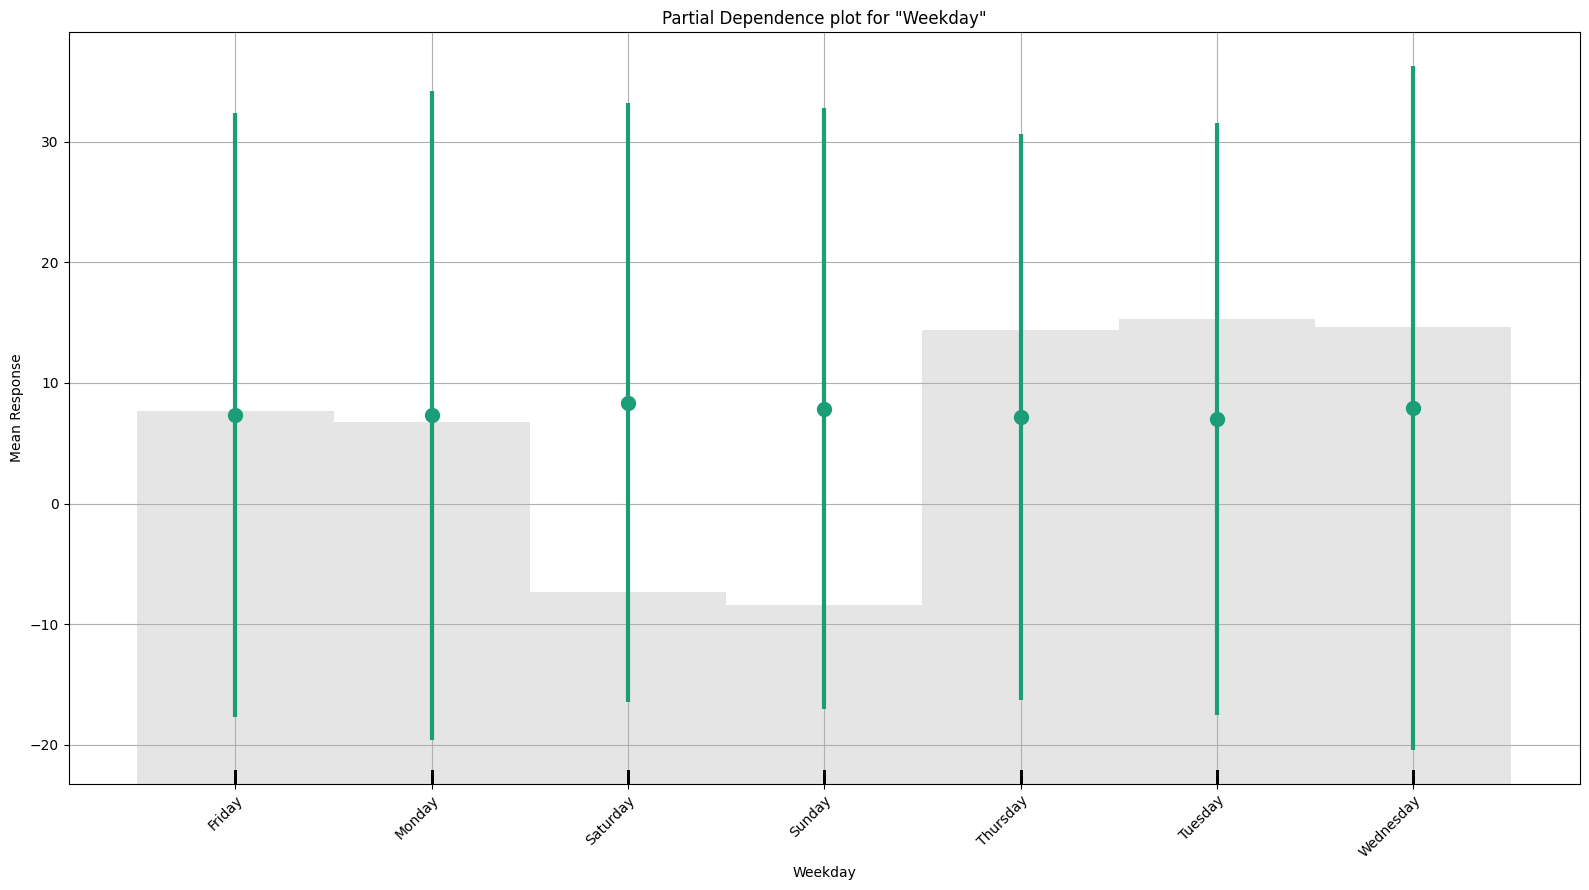

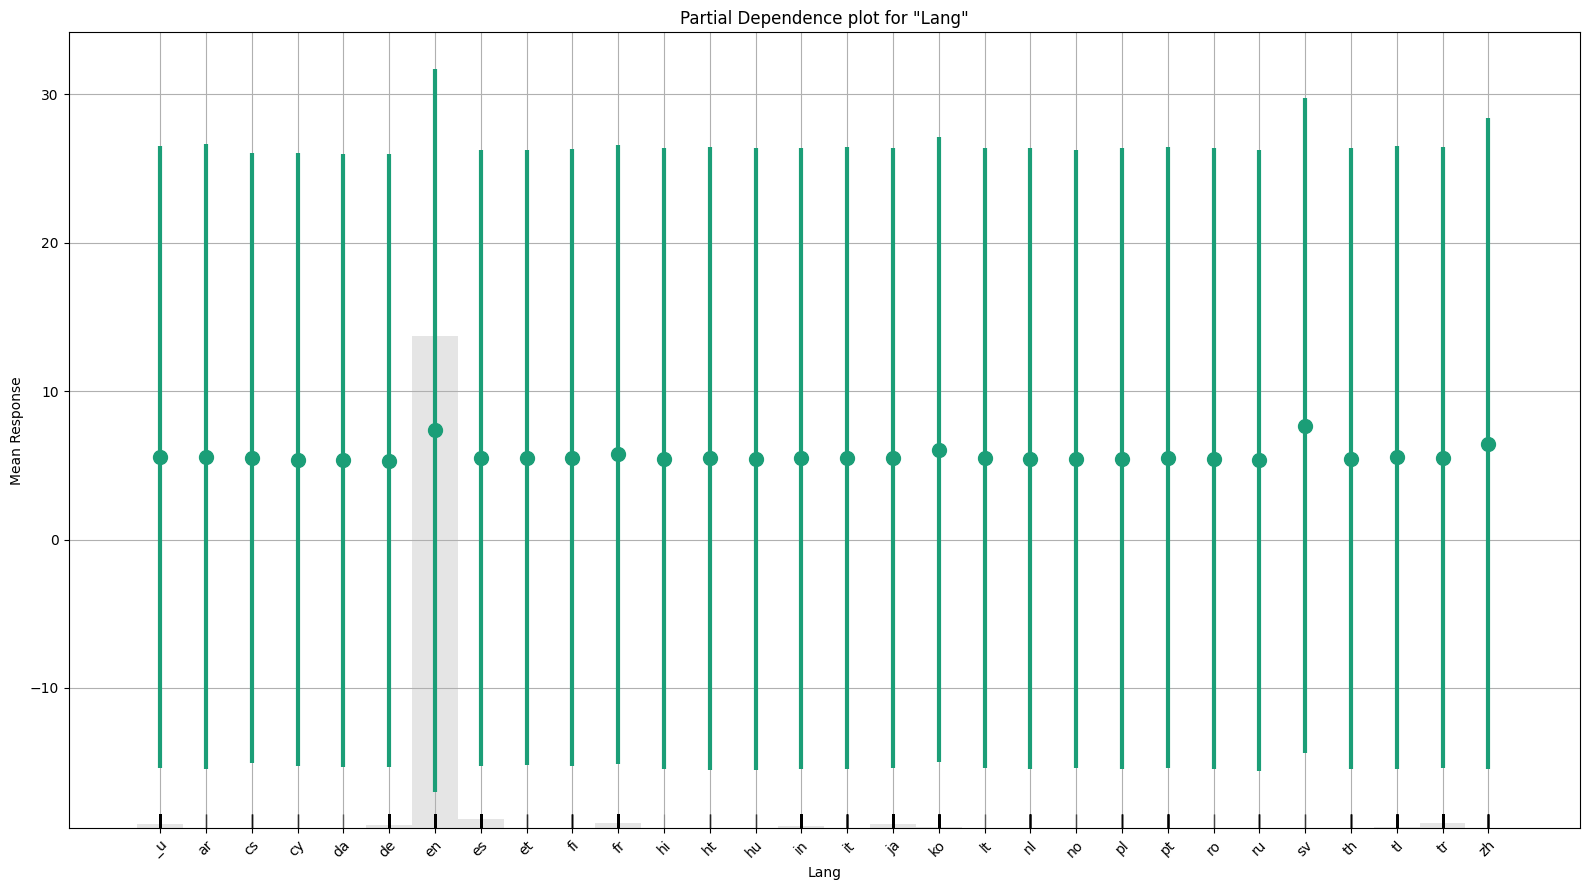

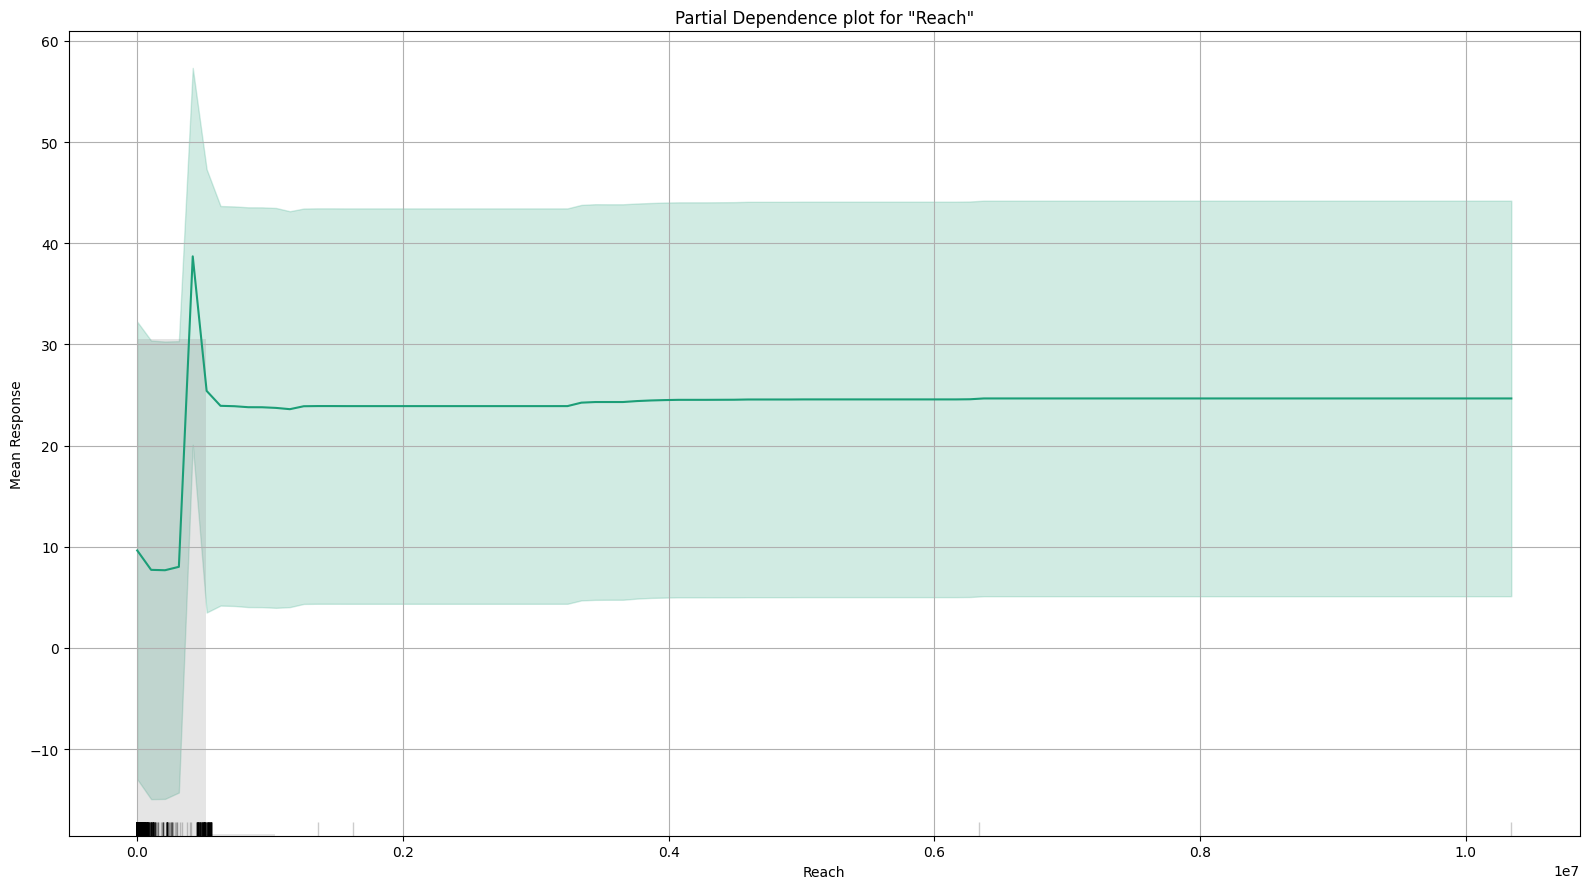

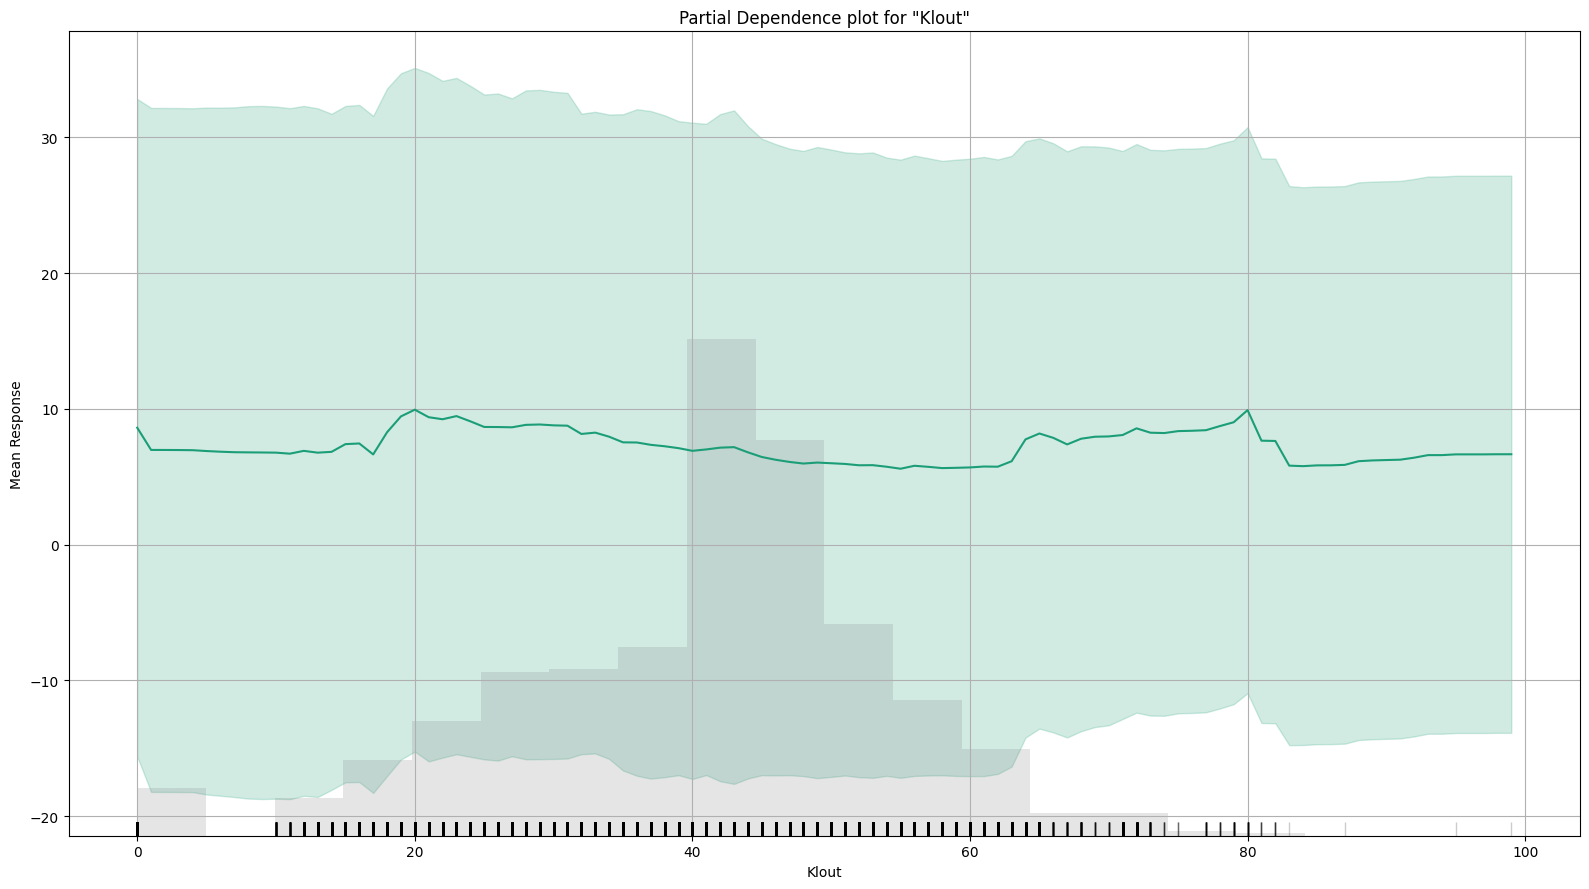

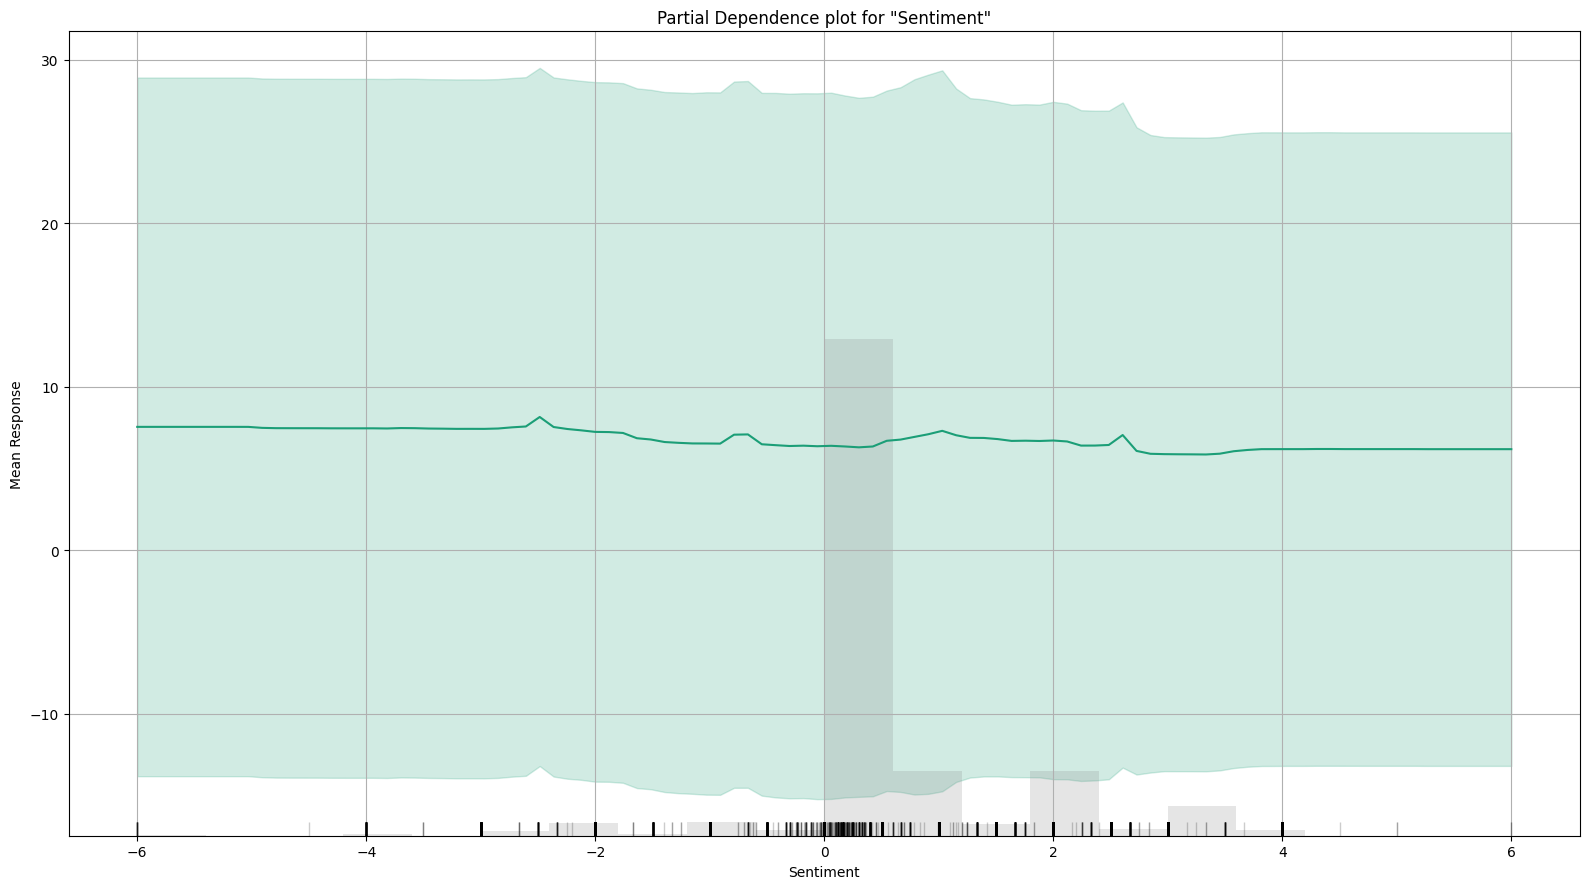

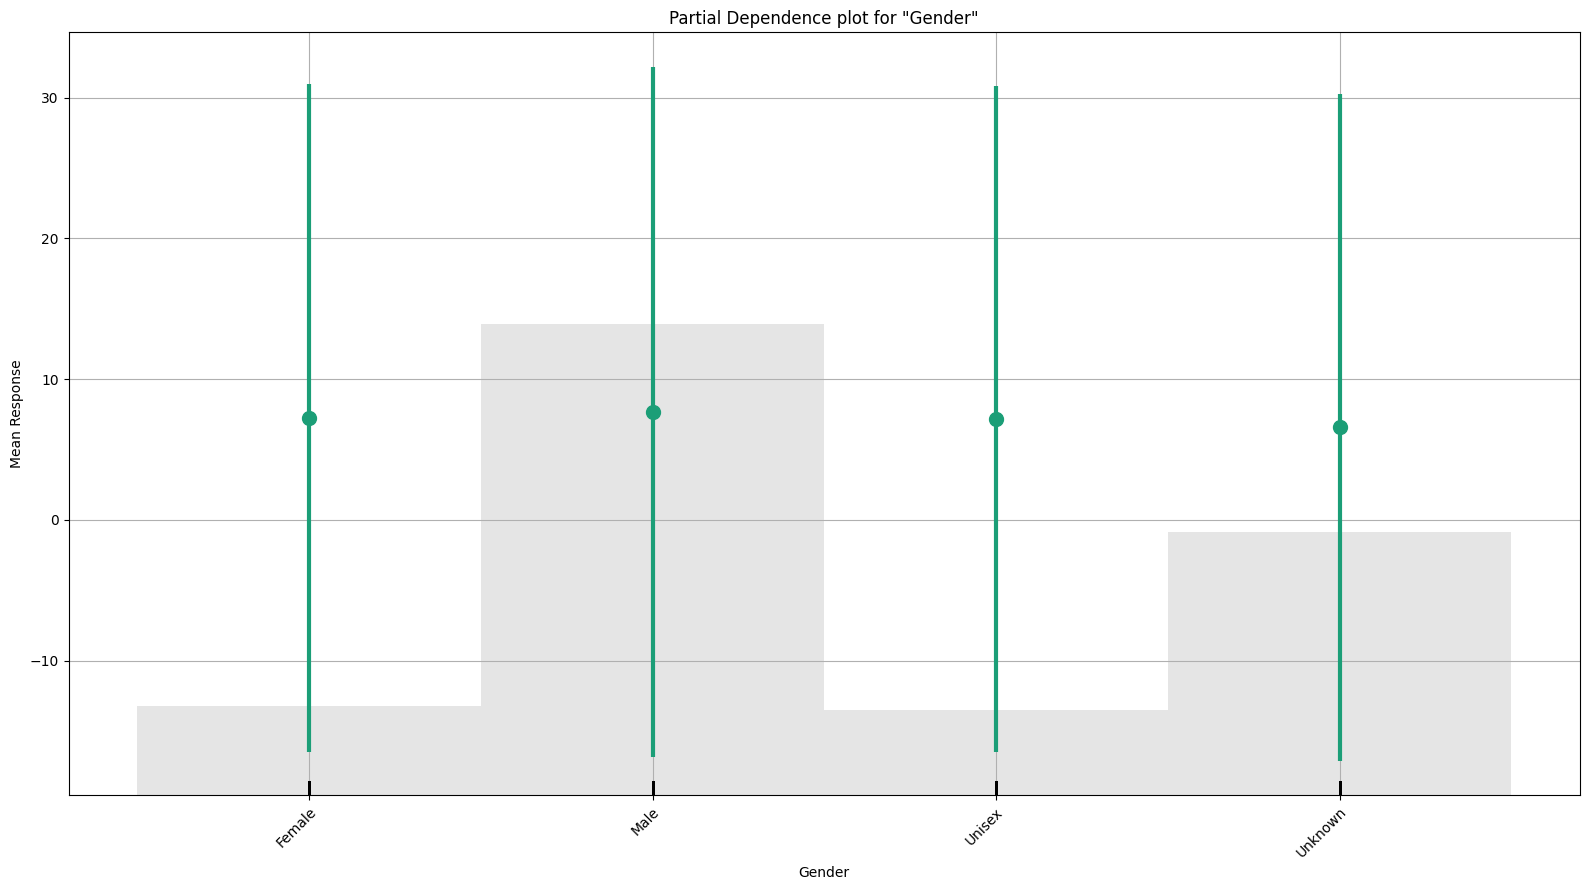

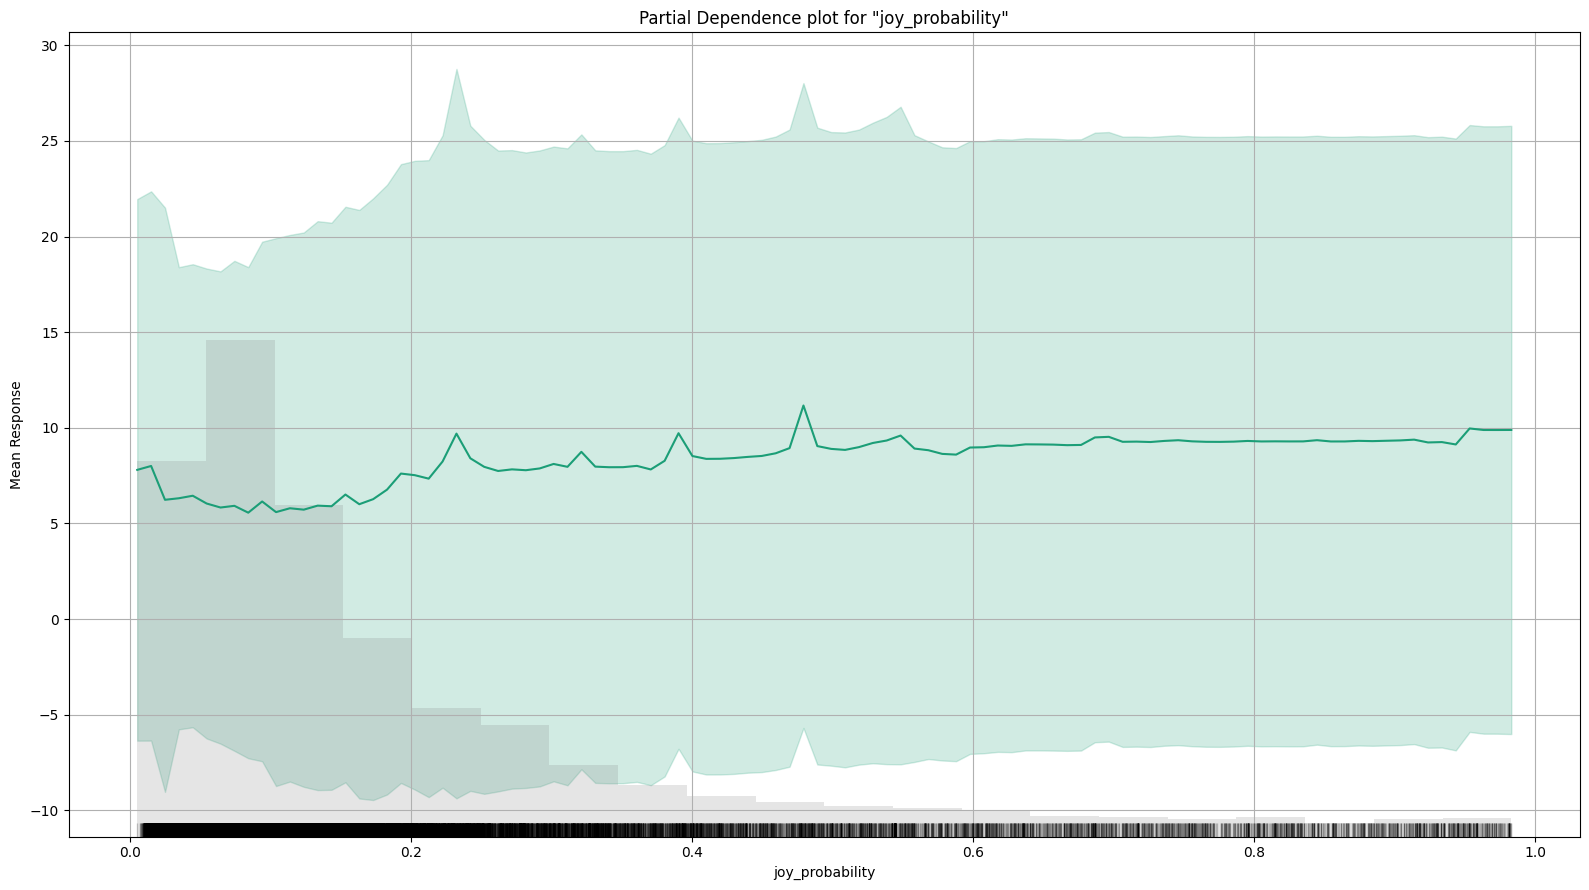

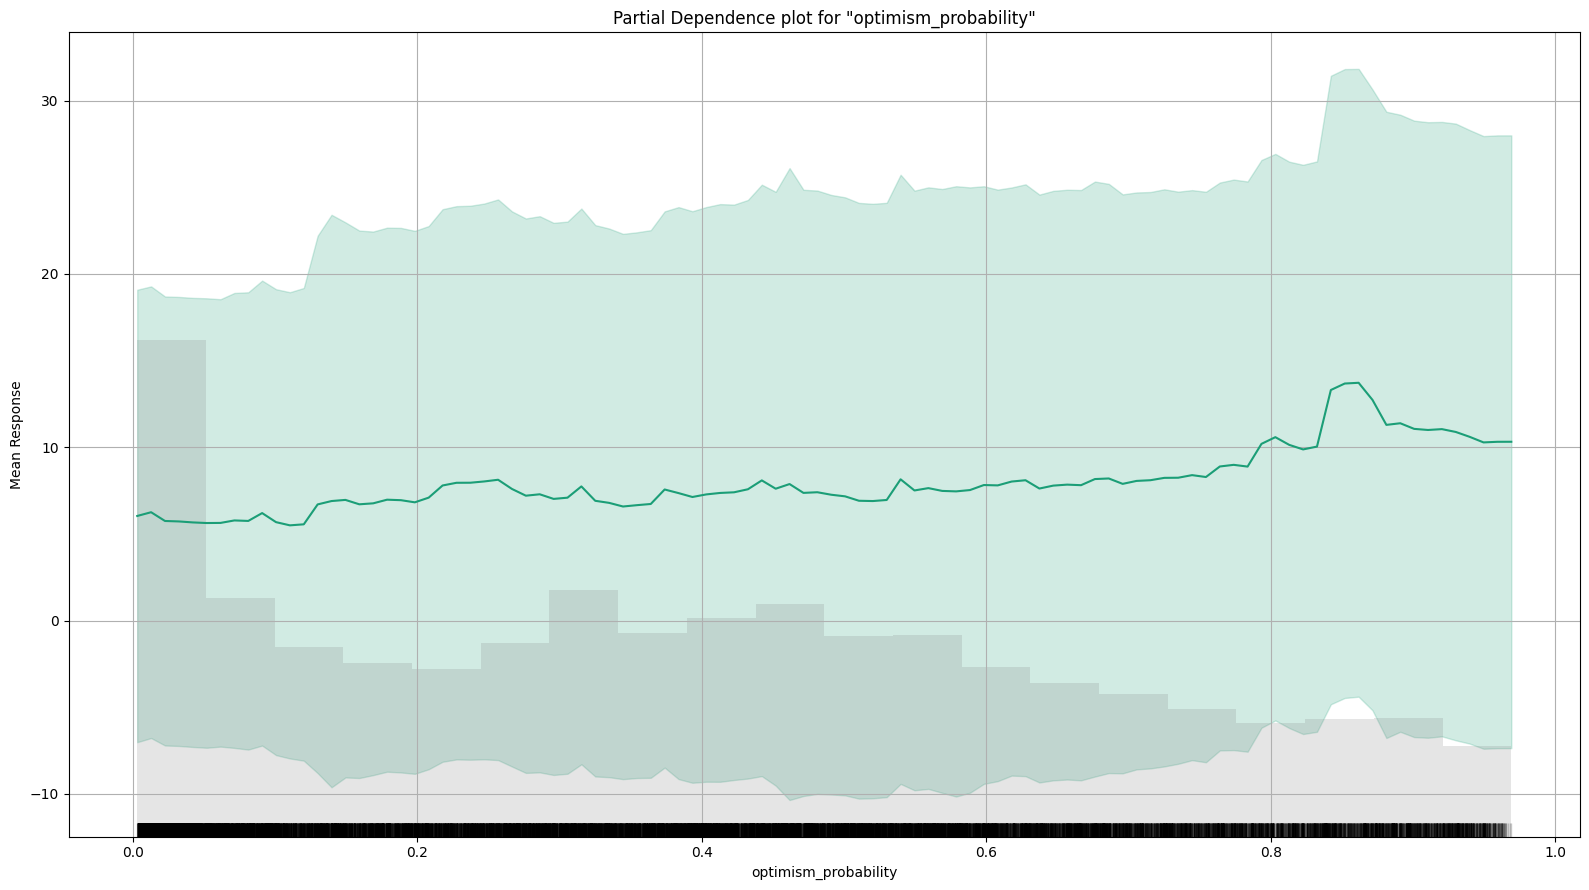

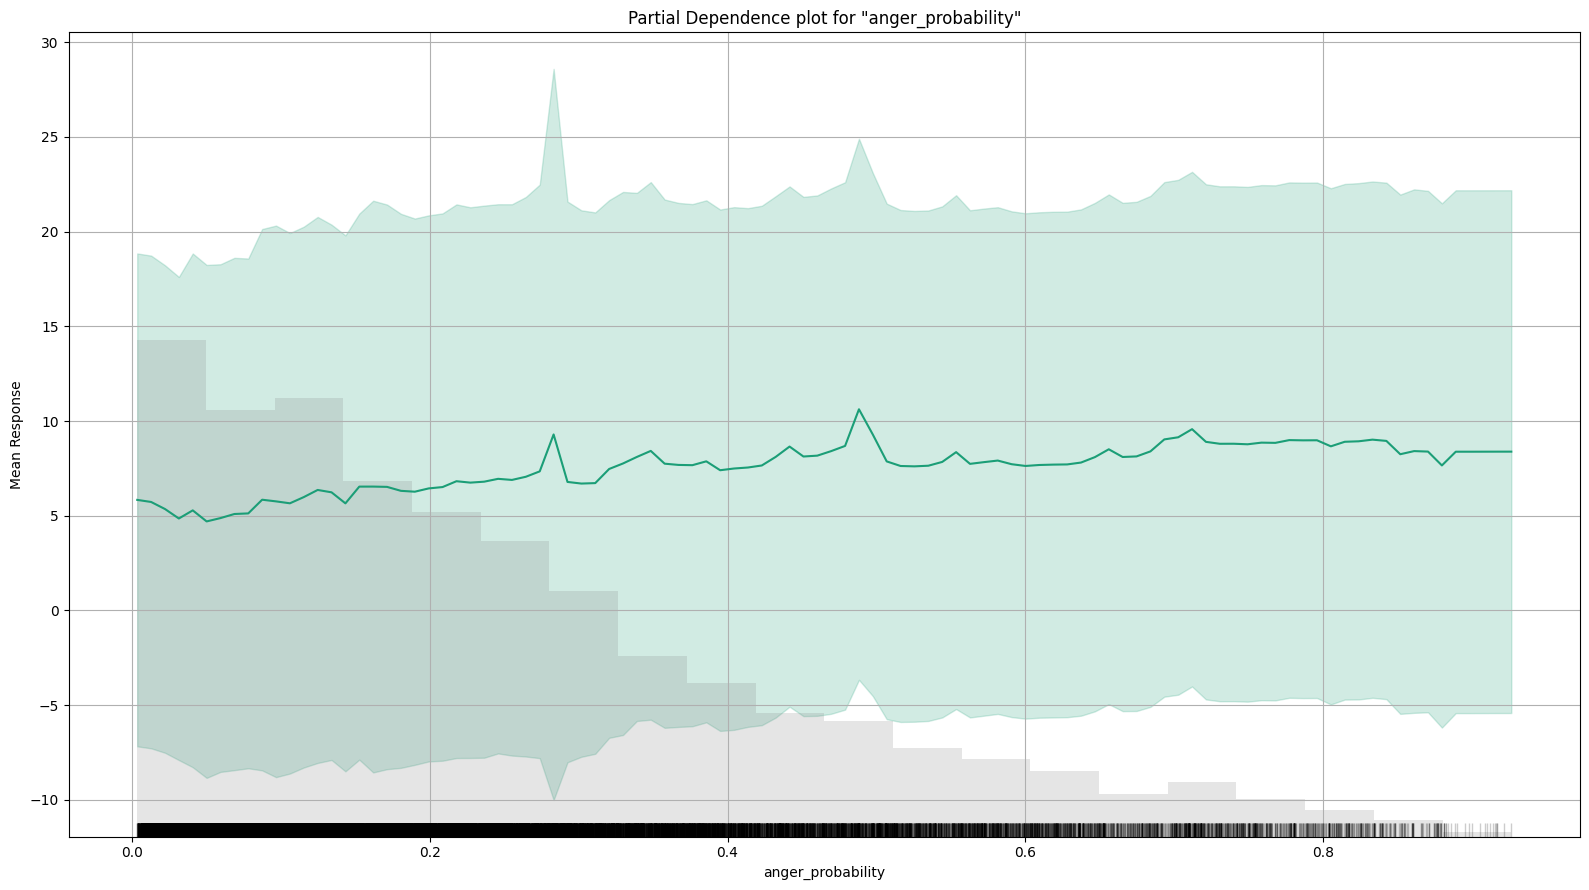

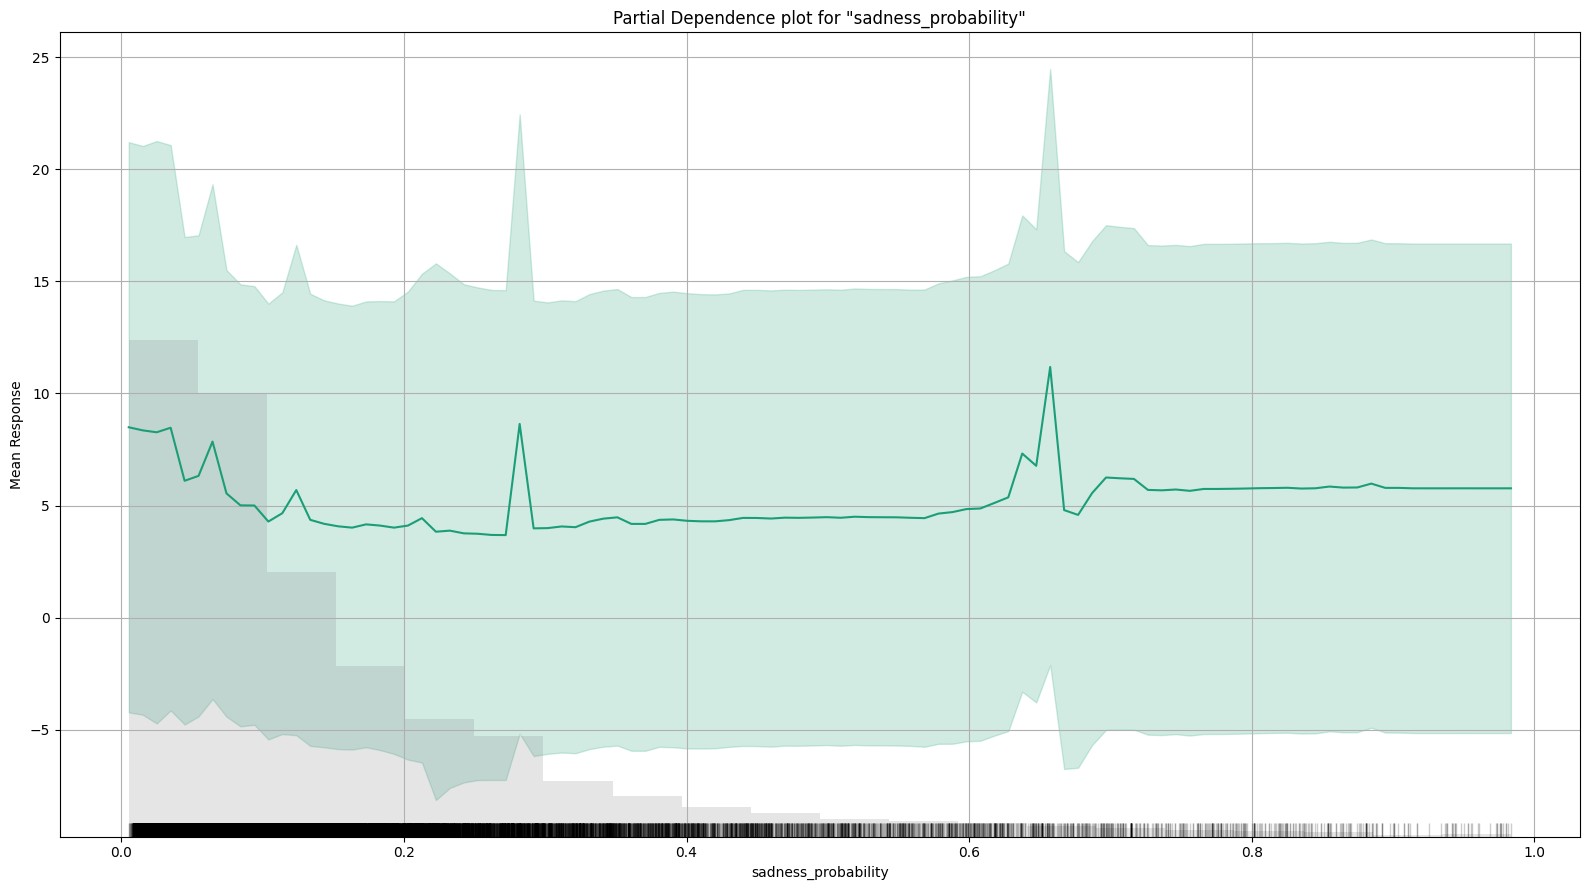

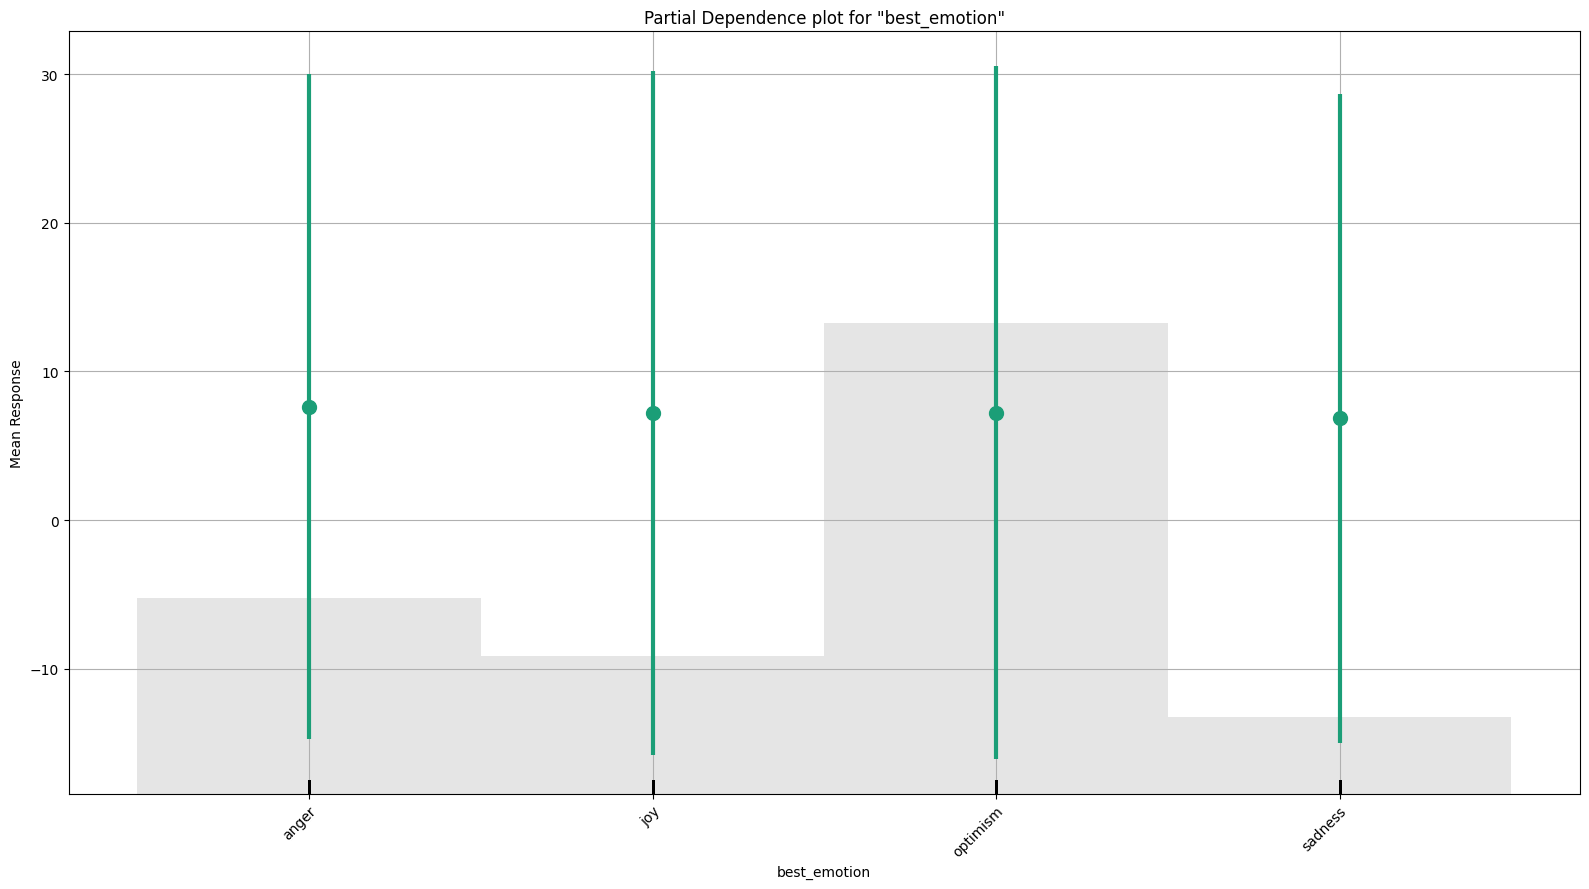

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

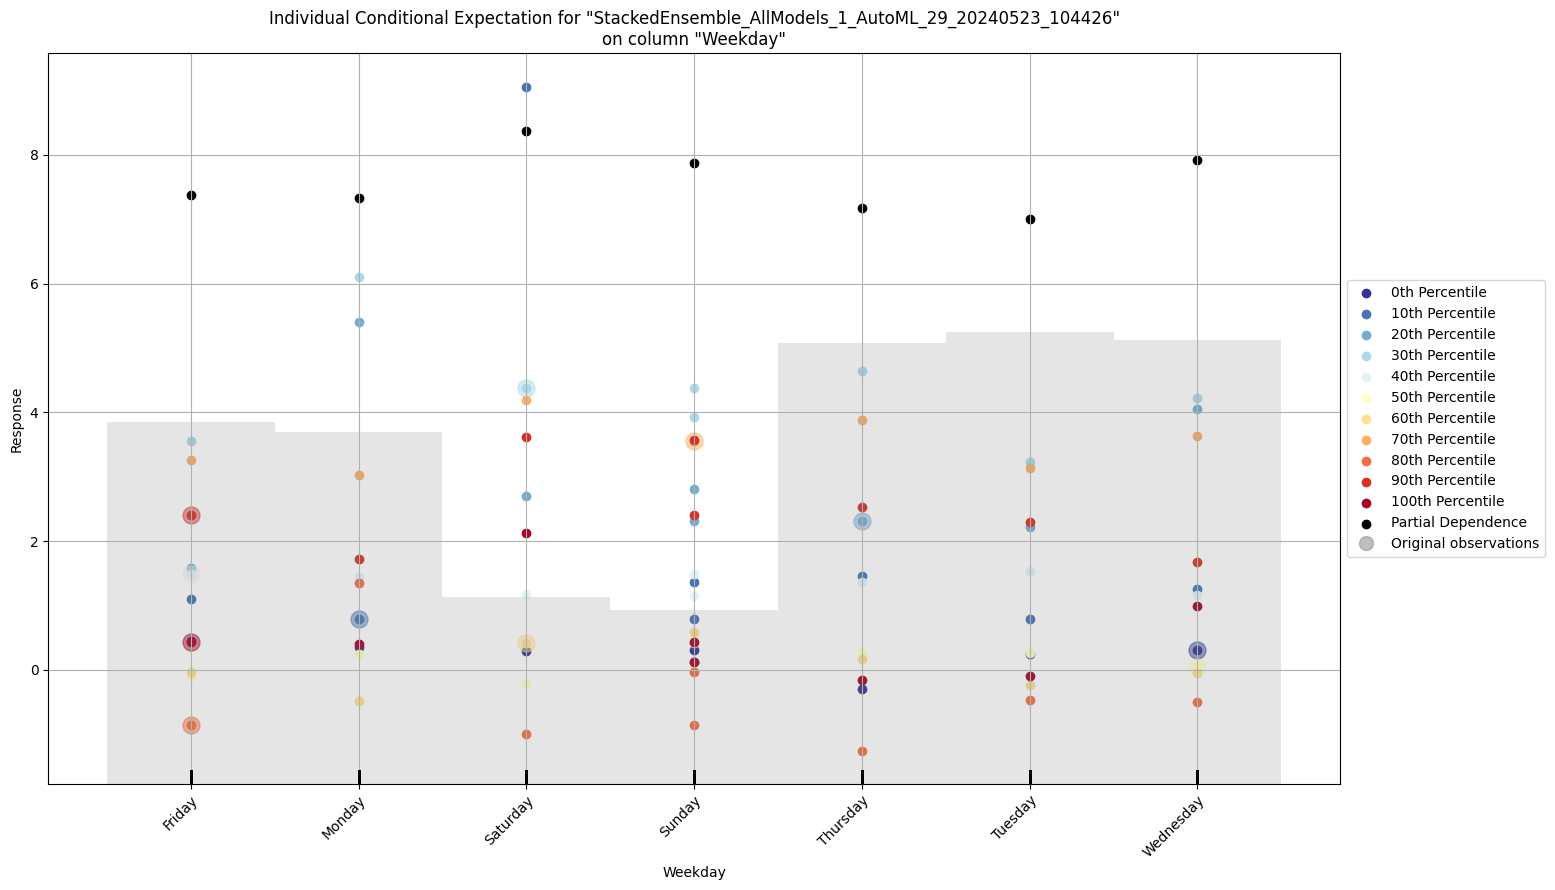

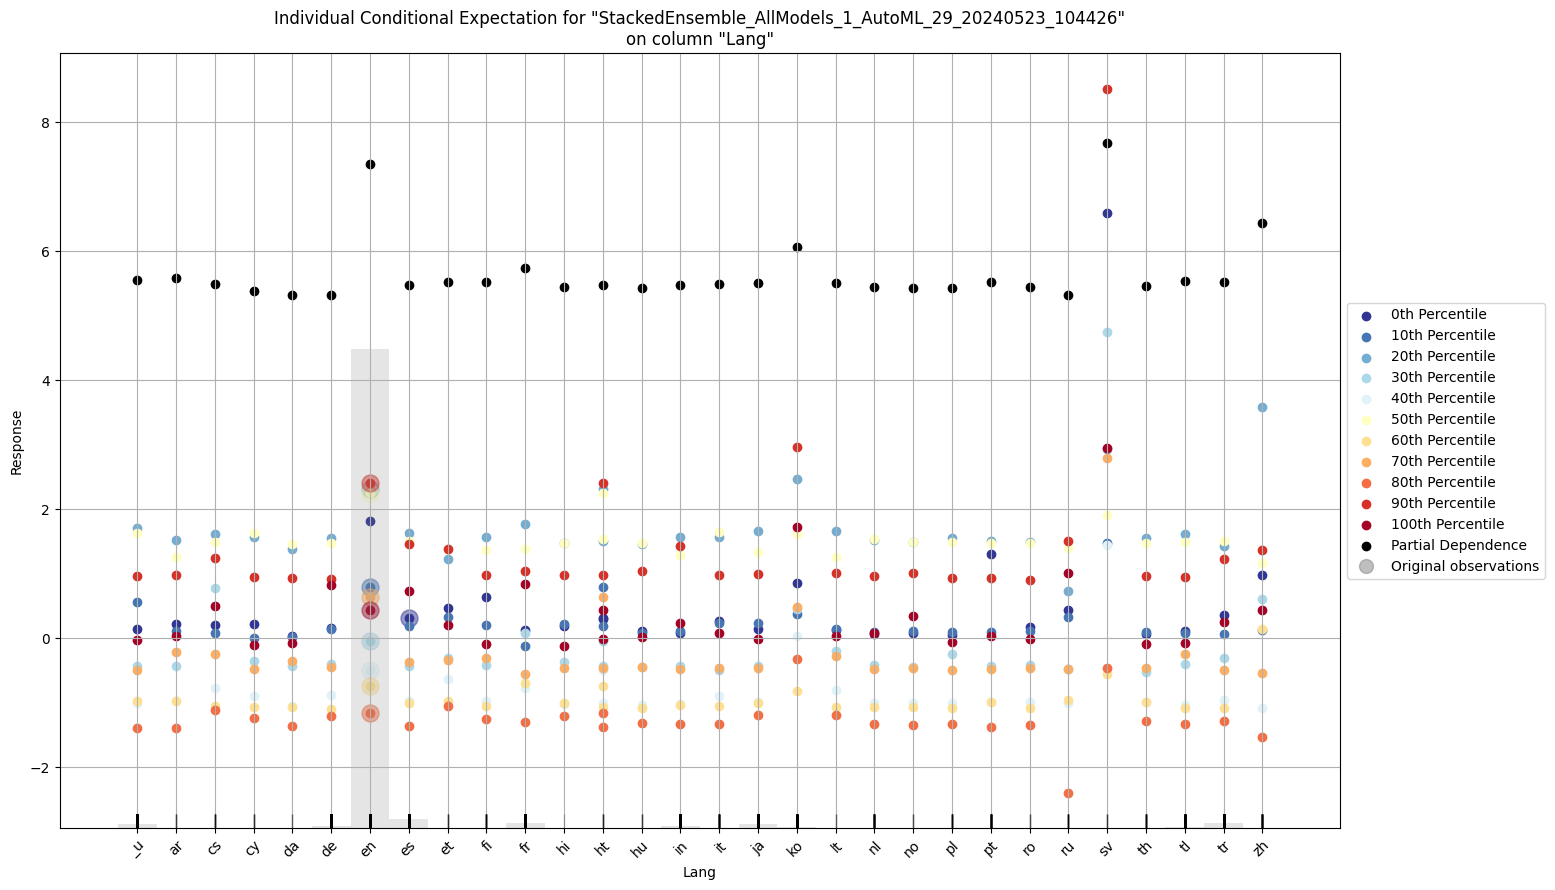

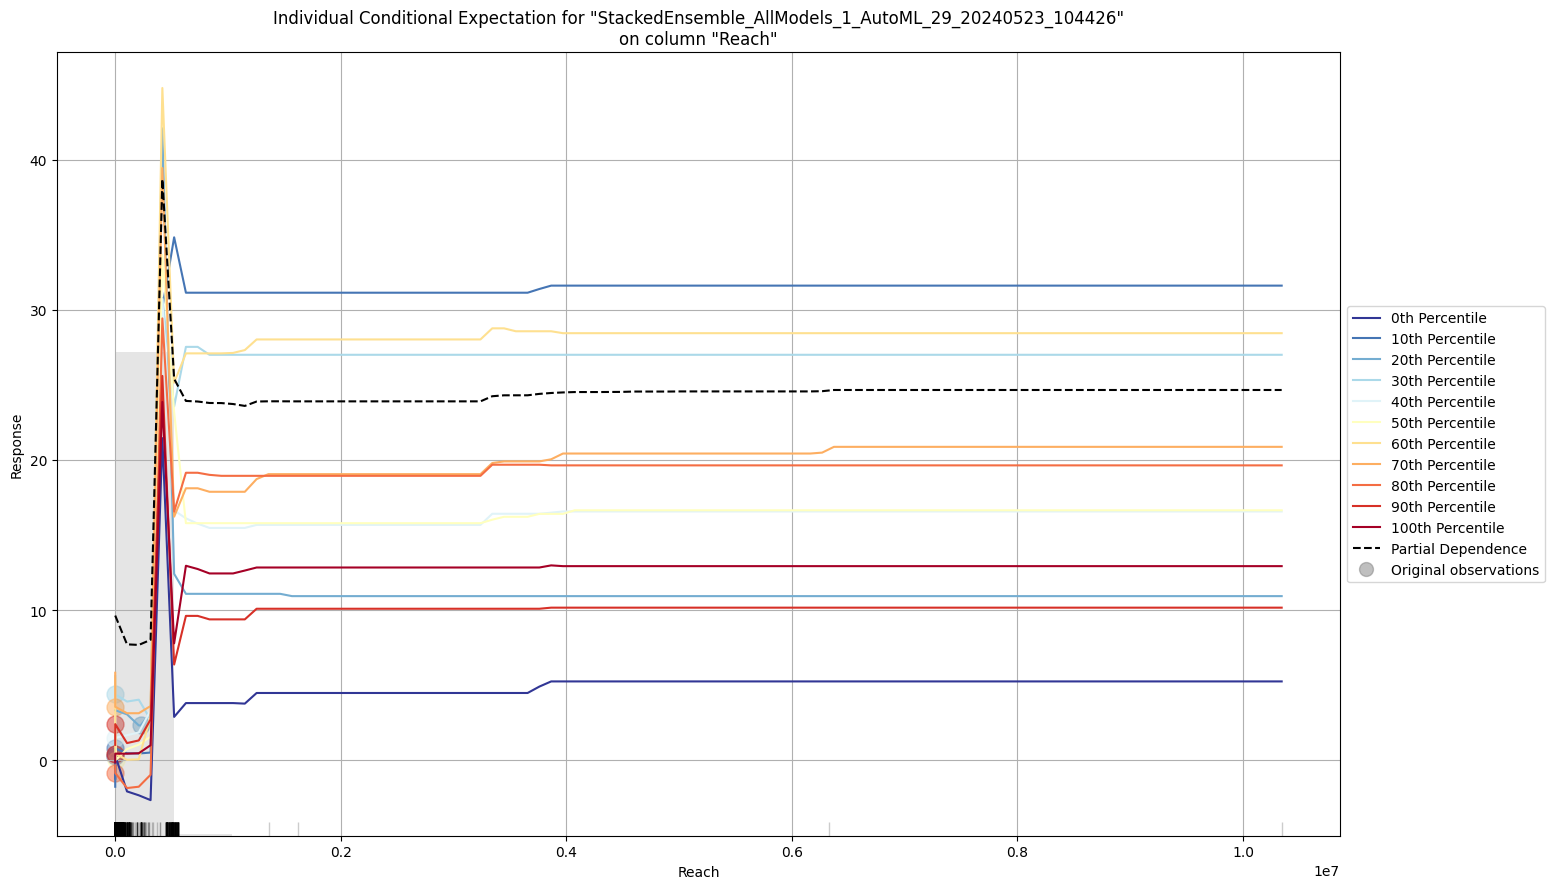

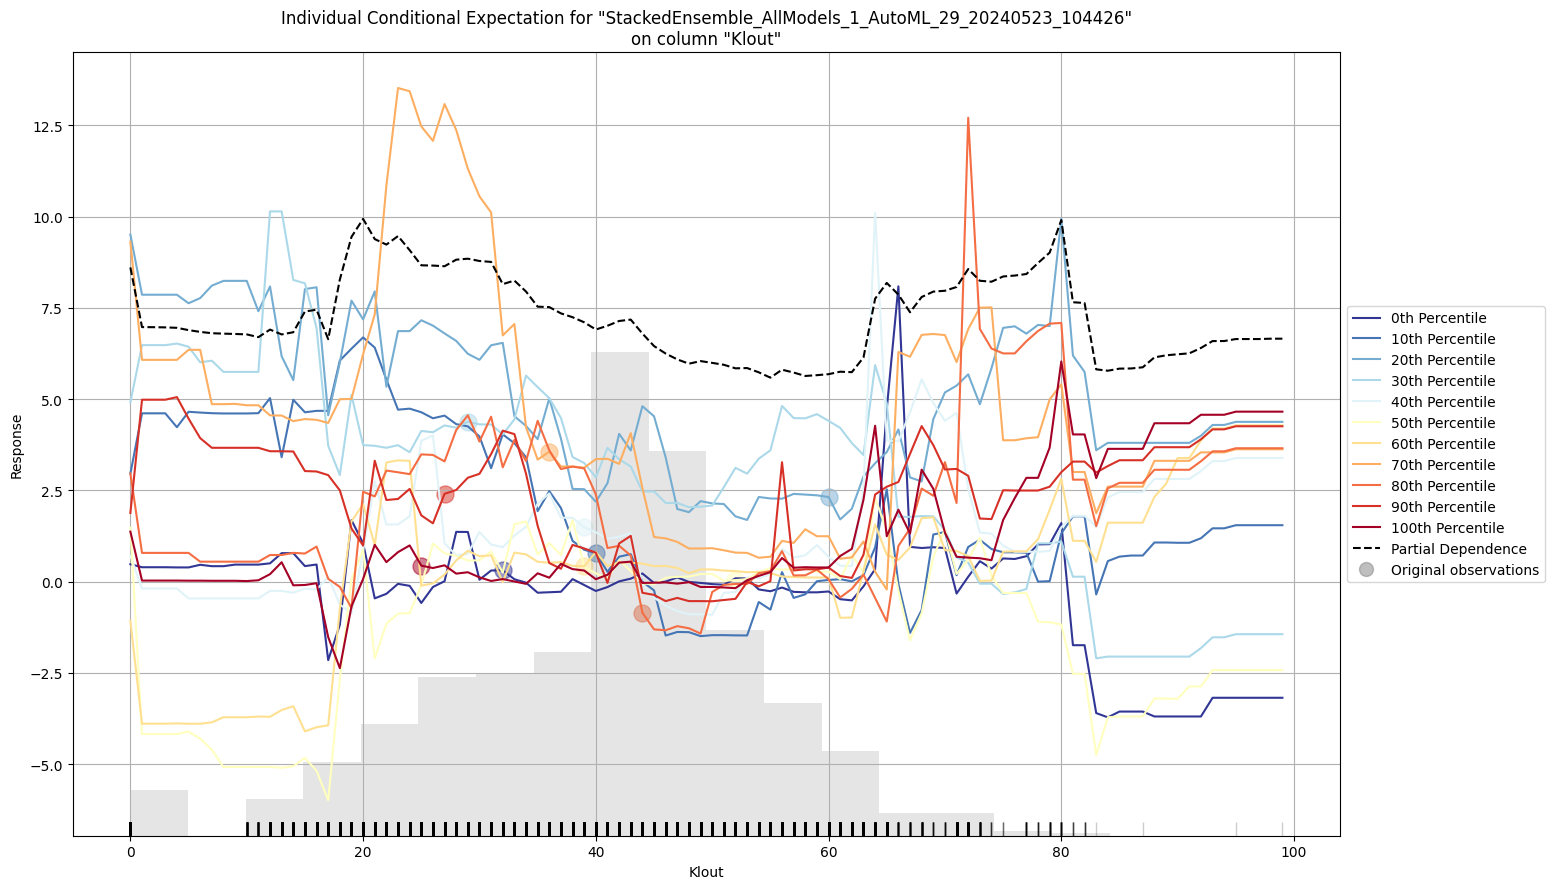

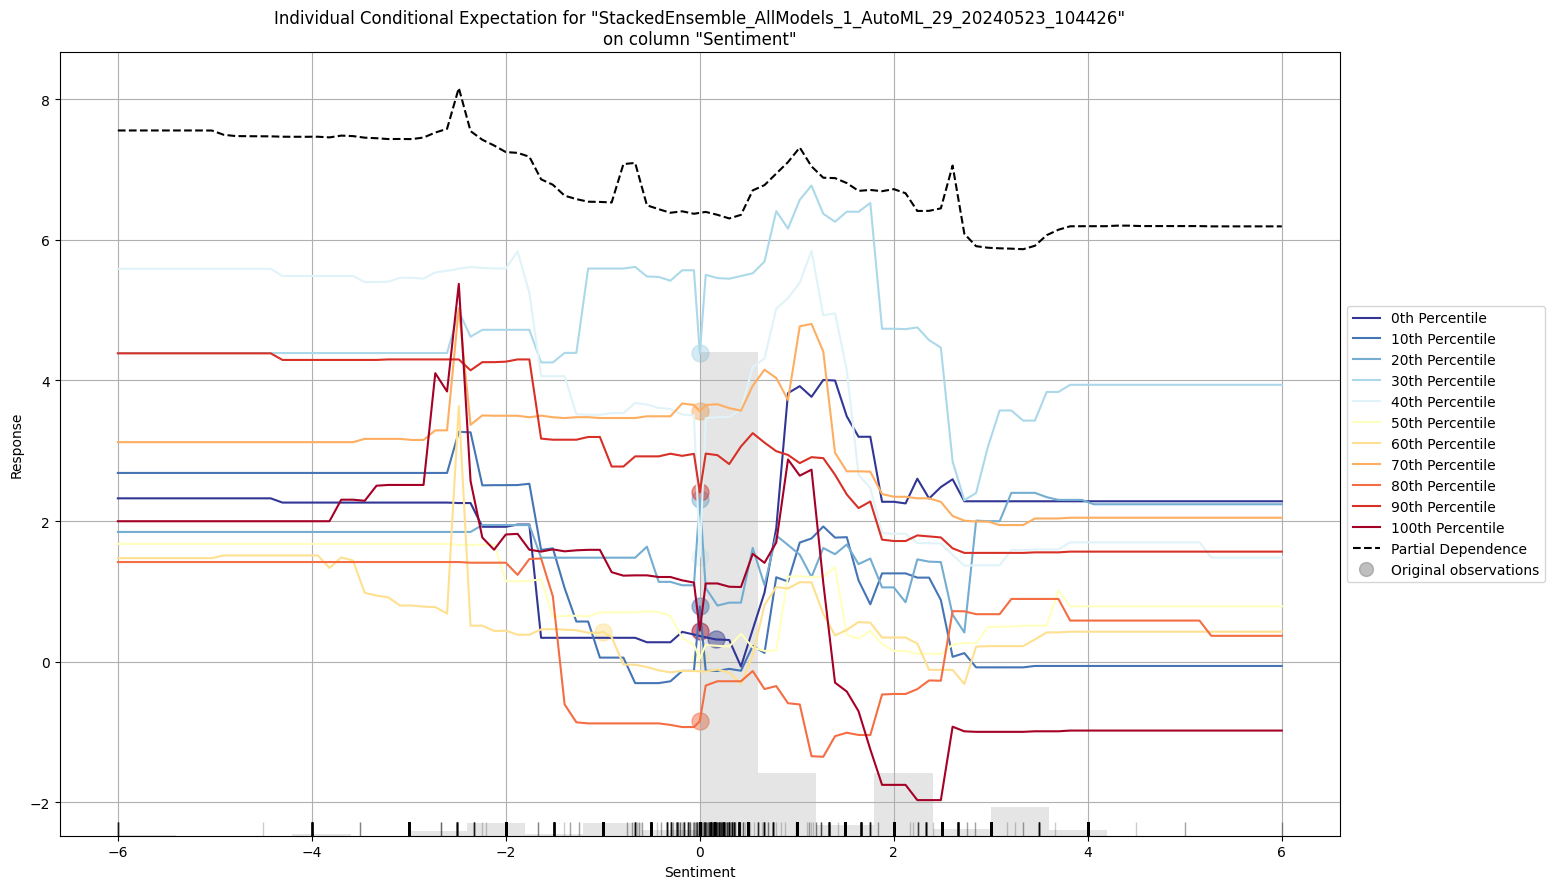

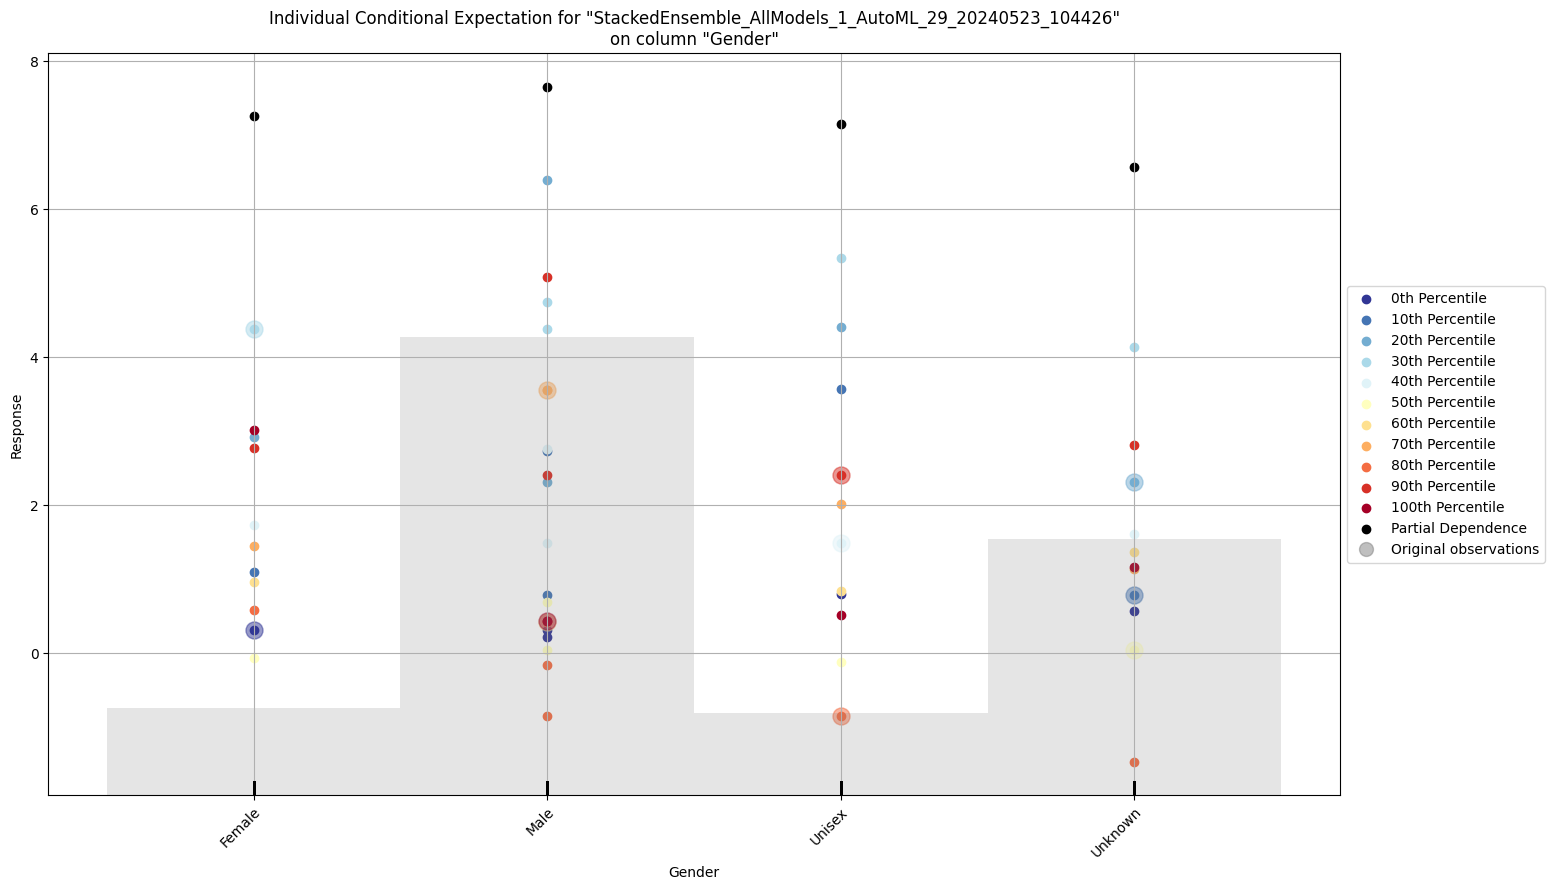

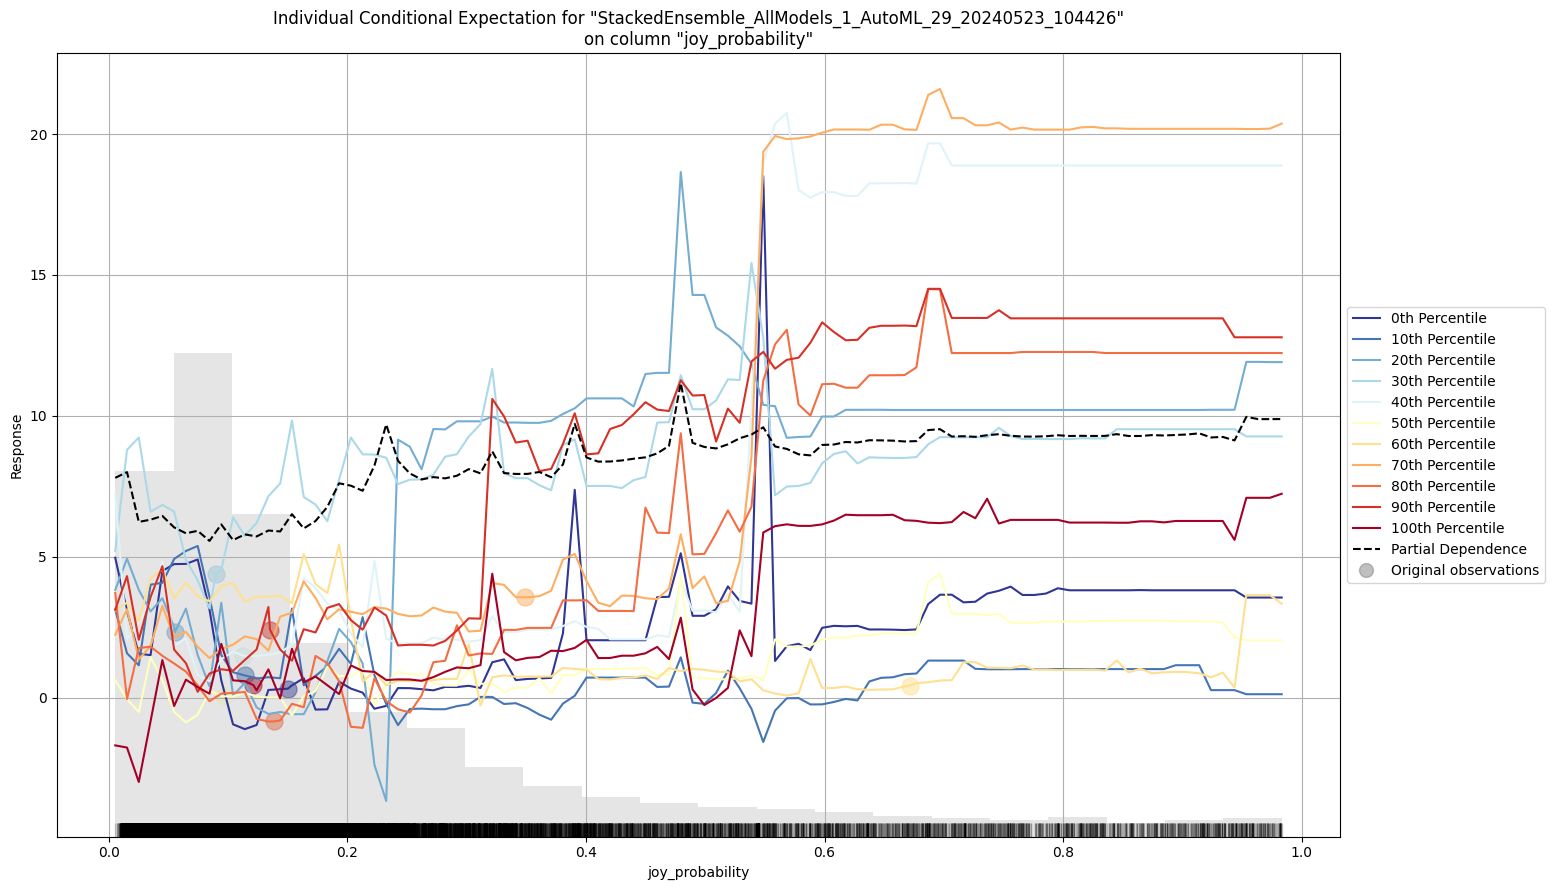

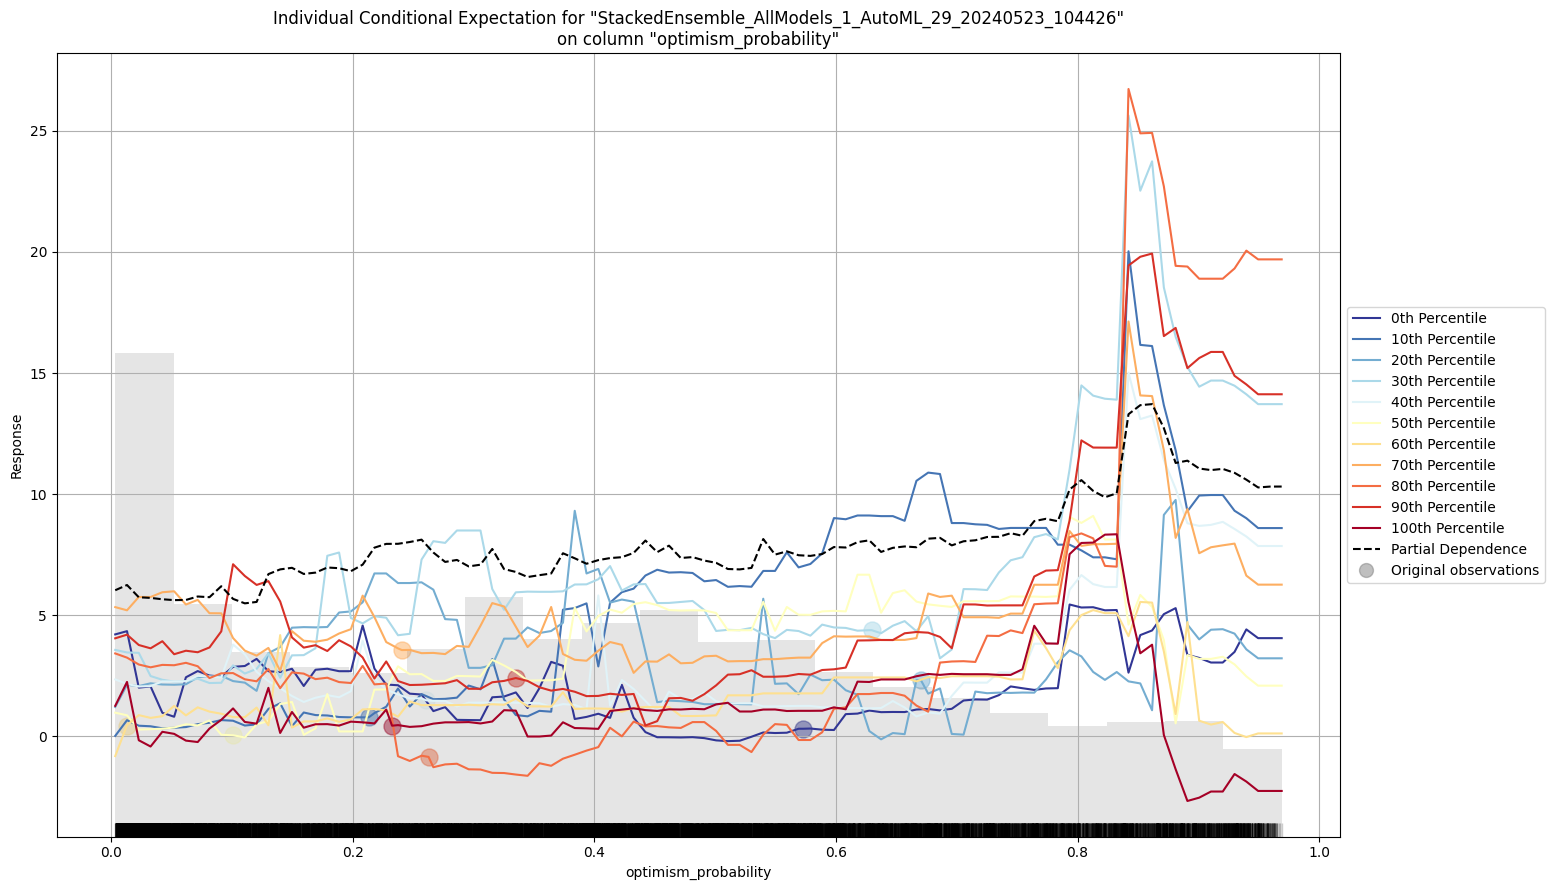

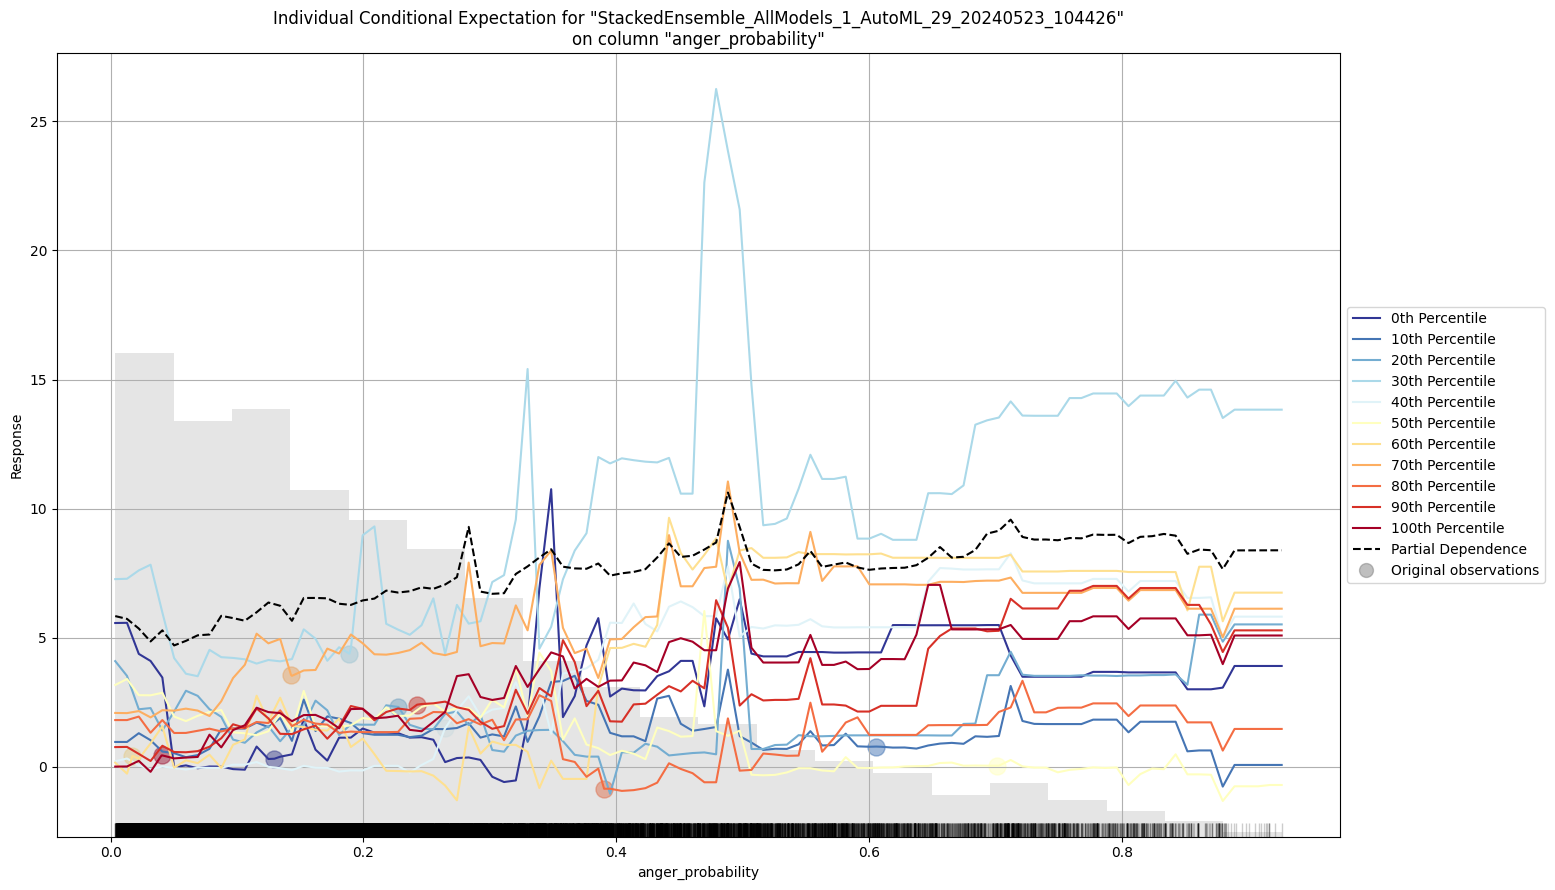

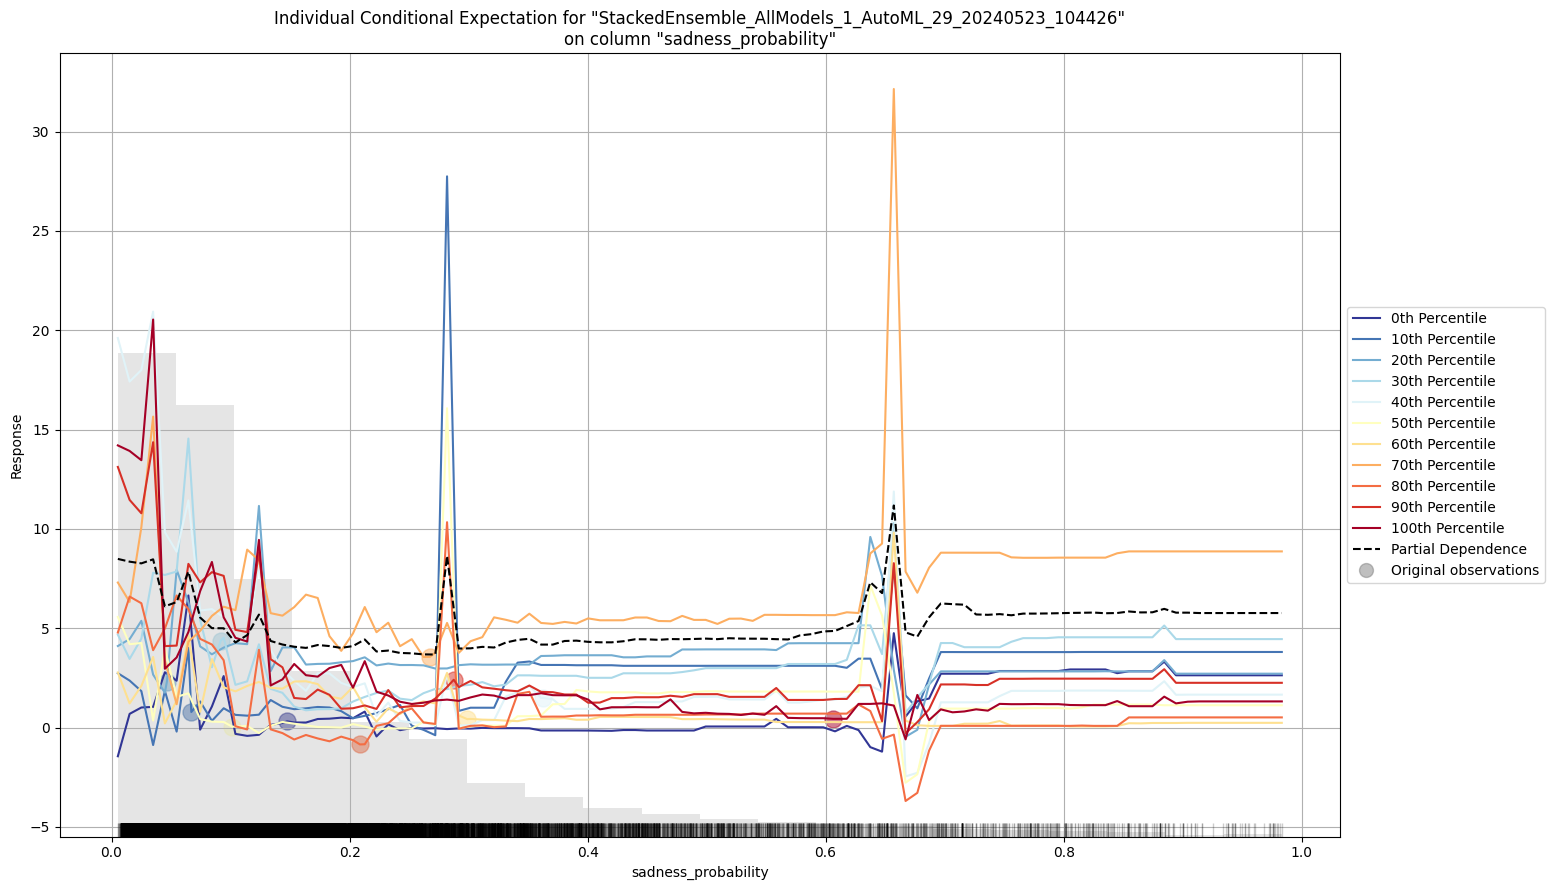

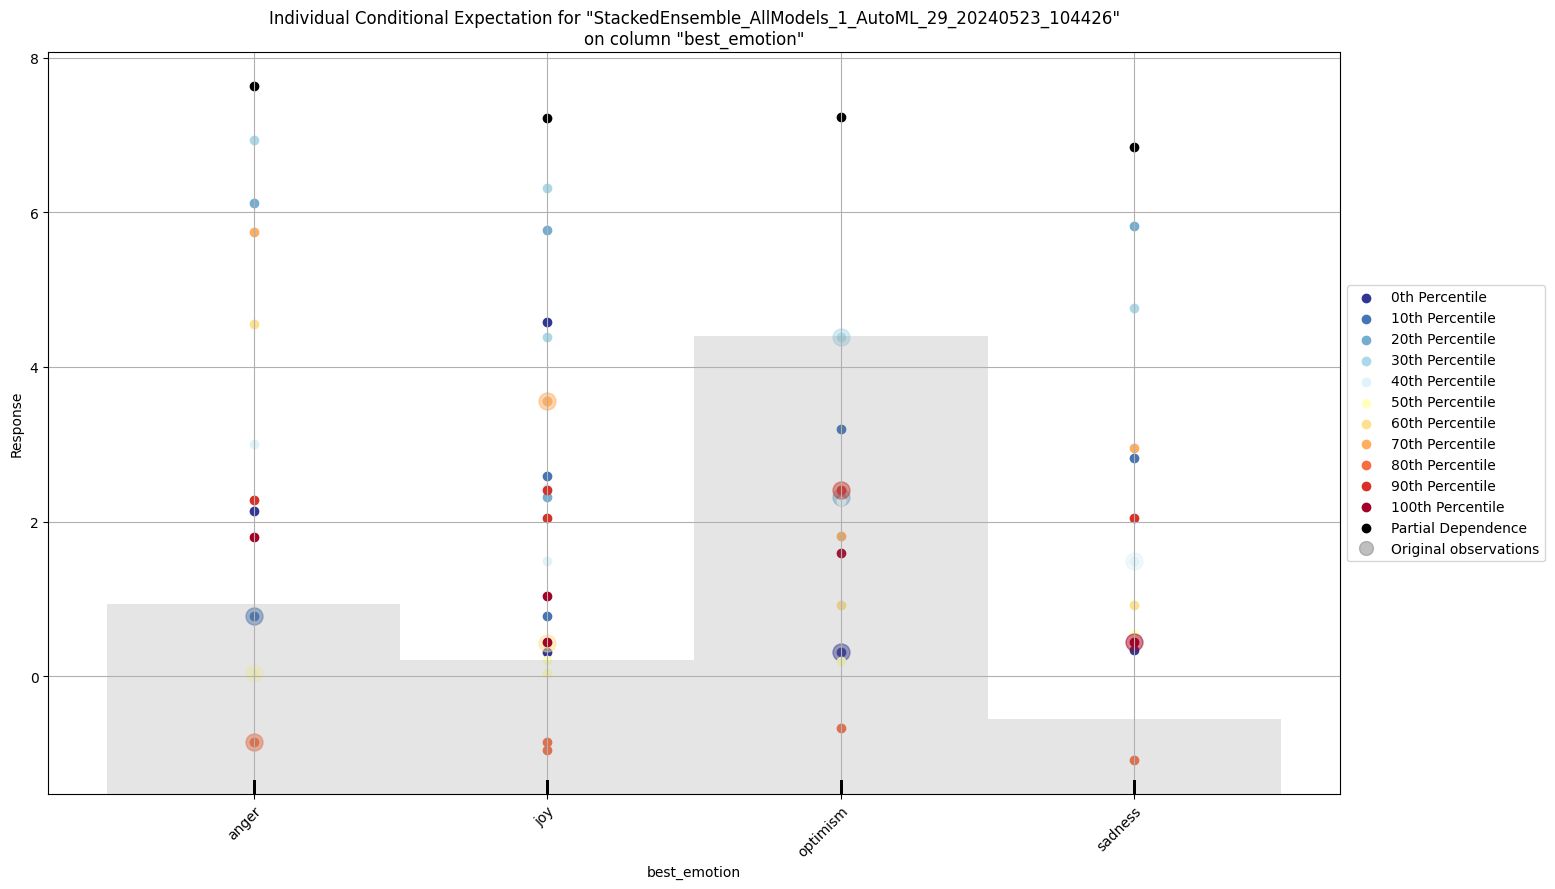

In [18]:
# model explanation for retweets
%matplotlib inline
best_model_retweets.explain(valid,render=True)